## 基于文本分析研究投资者情绪与中国黄金价格的关系
- 文本数据来源：*CNRDS中国研究数据服务平台的GUBA评论板块*
- 数据选取：*2020、2022年上市公司股吧帖子统计（自然日及交易时间）、其他股吧帖子统计（自然日及交易时间）*，并使用excel手动筛选了其中*主要经营黄金业务的上市公司股吧(中金黄金吧、山东黄金吧等6个股吧)*以及*两个黄金投资者集聚的“黄金吧”和“黄金概念吧”*的综合股吧数据
    - **短期内的投资者情绪影响显著**:在短期内,黄金价格的波动会受到投资者情绪波动的影响。具体来说,投资者情绪的正向冲击(如乐观情绪上升)会增大黄金价格的波动。这反映出市场情绪在短  期内对黄金市场的直接影响。尽管短期内投资者情绪对黄金价格波动有显著影响,但从长期来看,这种影响变得不那么显著。这可能是因为市场在长期内能够逐渐消化和适应投资者情绪的变化,从而保持相对稳定的价格波动（王河庆（2025））
- 数据的字节说明：
    - 自然日：
        - Name[股吧名称]-股吧名称
        - **Date[统计日期]-对股吧进行统计的日期，统计时段为0:00-24:00**
        - Tpostnum[帖子总量]-一日内上市公司所在股吧的全部发帖子数量总计，单位：篇
        - Pospostnum[正面帖子量]-一日内上市公司所在股吧的全部正面帖子数量总计，单位：篇
        - Negpostnum[负面帖子量]-一日内上市公司所在股吧的全部负面帖子数量总计，单位：篇
        - Neupostnum[中性帖子量]-一日内上市公司所在股吧的全部中性帖子数量总计，单位：篇
        - Readnum[阅读数]-一日内上市公司所在股吧的所发帖子的阅读数总计，单位：篇
        - Commentnum[评论数]-一日内上市公司所在股吧的所发帖子的评论数总计，单位：篇
    
    - 交易时间:
        - Name[股吧名称]-股吧名称
        - Date[统计日期]-对股吧进行统计的日期，统计时段为0:00-24:00
        - **Time[时间段]-根据发帖时间统计帖子的时间区间，其中星期一分为两个时间段：星期一凌晨0:00到上午9:00，为非交易时间；上午9:00-下午15:00为交易时间。星期二、三、四分为两个时间段，从上一天的下午15:00-当天的9:00为非交易时间，当天的9:00-15:00为交易时间。周五分为三个时间段，星期四15:00-星期五9:00为非交易时间，星期五9:00-15:00为交易时间，星期五15:00-星期五24:00为非交易时间。星期六、日为非交易时间，统计时间为0:00-24:00**
        - Weektime[星期时间]-统计时间段属于星期几
        - **Tradetime_Dum[是否交易时间段]-统计的时间段是否处于股市交易时间**
        - Tpostnum[帖子总量]-统计时间段内所在股吧的全部发帖子数量总计，单位：篇
        - Pospostnum[正面帖子量]-统计时间段内所在股吧的全部正面帖子数量总计，单位：篇
        - Negpostnum[负面帖子量]-统计时间段内公司所在股吧的全部负面帖子数量总计，单位：篇
        - Neupostnum[中性帖子量]-统计时间段内公司所在股吧的全部中性帖子数量总计，单位：篇
        - Readnum[阅读数]-统计时间段内公司所在股吧的所发帖子的阅读数总计，单位：篇
        - Commentnum[评论数]-统计时间段内公司所在股吧的所发帖子的评论数总计，单位：篇
- 依据：
    - CNRDS被多篇研究金融领域的文本情感分析的论文所采用
    - 东方财富网股吧
        - 段江娇等(2017)、李等(2019)验证了东方财富网股吧情绪对股票市场的预测能力;范小云等(2022)、顾洪梅和张嫚玲(2022)、钱宇等(2020)、薛怡彤(2024)、盘世康(2024)等作为投资者情绪分析的指标构建或方法评估的主要文本来源

- **核心思路：**
1. **数据整合与预处理**： 将四个数据集加载进来，*统一数据格式，特别是时间列*，并理解数据结构。
2. **情感指标构建**： 利用已有的正面/负面/中性帖子数量，构建更综合的*情感指数*。
3. **描述性统计与探索性分析 (EDA)**： 计算基本统计量，*初步可视化*，了解数据的整体分布和特征。
4. **时间序列分析与可视化**： 重点分析**情感指数、发帖量、阅读/评论数**等指标随**时间**的变化趋势，进行对比分析。
5. **关联性分析**： 探索情绪指标与黄金价格（需要外部数据）之间的相关性。

6. **（亮点拓展）引入前沿概念/方法**：
    - **注意力机制模拟**: 虽然不能直接用LLM分析原始文本，但可以模拟"注意力"概念，构建加权情感指数（考虑阅读数/评论数）。
    - **市场关注度分析**: 利用帖子总量、阅读数、评论数作为市场对黄金或特定公司关注度的代理指标。
    - **交易/非交易时段情绪差异**: 利用交易时间数据，分析开盘/盘中/收盘/非交易时段的情绪特征。
    - **简单的时序预测模型**: 尝试用历史情绪指标预测未来情绪波动（注意：预测价格风险大且可能不准确，但可以作为方法展示）。
    - **精美交互式可视化**: 使用 Plotly 等库创建可交互的图表。



## 第1步：导入安装包及中文配置
- 采用`numpy,pandas,statsmodels`这三个库作为数据分析库，采用`matplotlib、seaborn、plotly`作为结果可视化库

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # 用于交互式绘图
import plotly.graph_objects as go # 更底层的Plotly绘图
from plotly.subplots import make_subplots # 创建子图
import statsmodels.api as sm # 用于统计分析，如相关性
from statsmodels.tsa.stattools import adfuller, grangercausalitytests # For stationarity and Granger
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Ignore some future warnings from libraries

# --- 设置 Matplotlib 中文和坐标轴负号显示 (确保这个设置有效) ---
try:
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    print("已设置字体为 SimHei for Matplotlib")
except Exception as e:
    print(f"设置 Matplotlib 字体失败: {e}")

已设置字体为 SimHei for Matplotlib


## 第2步：数据加载与预处理
- 由于数据库本身经过严格处理，因此我重点进行了文件间*名称统一，处理日期，过滤周期*工作
- 时间段筛选：选取了近几年黄金市场大震荡的两大重要事件时间段，分别是：
    - **疫情时期：2020年7-10月**（美元加息导致黄金价格暴涨）
    - **俄乌战争：2022年2-5月**

In [32]:
# --- 文件路径 ---
file_paths = {
    'other_trading': 'other_guba_trading_time.csv',
    'other_daily': 'other_guba_daily.csv',
    'company_trading': 'company_guba_trading_time.csv',
    'company_daily': 'company_guba_daily.csv'
}

# --- Helper Functions ---
# --- 定义列名清洗函数 ---
def clean_col_names(df):
    """去除列名中的中括号及其内容"""
    df.columns = df.columns.str.replace(r'\[.*?\]', '', regex=True)
    # 修正字段说明中不一致的 Tradetm_dum -> Tradetime_Dum
    if 'Tradetm_dum' in df.columns:
         df.rename(columns={'Tradetm_dum': 'Tradetime_Dum'}, inplace=True)
    return df
# --- 定义时间转换函数 ---
def parse_dates(df, date_col='Date'):
    """Robust date parsing."""
    expected_date_formats = ['%Y/%m/%d', '%Y-%m-%d']
    converted = False
    if date_col not in df.columns:
        print(f"错误: 日期列 '{date_col}' 不在 DataFrame 中。")
        return None # 返回 None 表示失败

    # 尝试去除时间部分（如果存在）
    if df[date_col].dtype == 'object':
         df[date_col] = df[date_col].str.split(' ').str[0]

    for fmt in expected_date_formats:
        try:
            df[date_col] = pd.to_datetime(df[date_col], format=fmt)
            converted = True
            break
        except (ValueError, TypeError):
            continue
    if not converted:
        try:
            df[date_col] = pd.to_datetime(df[date_col]) # Fallback to auto-parsing
            converted = True
        except Exception as e:
            print(f"警告：日期列 '{date_col}' 转换失败: {e}")
            return None # 返回 None 表示失败
    df[date_col] = pd.to_datetime(df[date_col].dt.date) # 确保只保留日期部分，并转回 datetime
    return df

# --- 加载和初步处理数据 --- ==
print("--- 1. 加载和预处理数据 ---")
dfs = {}
for name, path in file_paths.items():
    try:
        # 尝试 UTF-8 或 GBK 编码
        try:
            df = pd.read_csv(path, encoding='utf-8-sig')
        except UnicodeDecodeError:
            print(f"'{path}' 使用 UTF-8 读取失败，尝试 GBK...")
            df = pd.read_csv(path, encoding='gbk')

        df = clean_col_names(df)
        df = parse_dates(df)
        if df is None: # 如果日期解析失败，跳过此文件
            print(f"跳过文件 {path} 因为日期解析失败。")
            continue

        dfs[name] = df
        print(f"成功加载并处理: {path}")
        print(f"数据预览:\n{df.head(3)}\n")
        print(f"列名: {df.columns.tolist()}\n")
    
    except FileNotFoundError:
        print(f"错误：文件 '{path}' 未找到。")
    except Exception as e:
        print(f"加载或处理文件 '{path}' 时出错: {e}")

# --- Filter Time Periods ---
periods_of_interest = {
    '疫情期': ('2020-07-01', '2020-10-31'),
    '俄乌冲突期': ('2022-02-01', '2022-05-31')
}
dfs_filtered = {}
for name, df in dfs.items():
    df_period_list = []
    if df is None or 'Date' not in df.columns: continue # 跳过加载或日期处理失败的 df
    for period_name, (start_date, end_date) in periods_of_interest.items():
        try:
            start_date_dt = pd.to_datetime(start_date)
            end_date_dt = pd.to_datetime(end_date)
            mask = (df['Date'] >= start_date_dt) & (df['Date'] <= end_date_dt)
            if mask.any(): # 只有当掩码不全为False时才处理
                df_period = df.loc[mask].copy() # 使用 .loc 避免潜在的索引问题
                df_period['Period'] = period_name
                df_period_list.append(df_period)
        except Exception as filter_e:
            print(f"筛选 '{name}' 数据集时期 '{period_name}' 时出错: {filter_e}")

    if df_period_list:
        dfs_filtered[name] = pd.concat(df_period_list).sort_values(by='Date') # 按日期排序
        print(f"已筛选 '{name}'。行数: {len(dfs_filtered[name])}")
    # else:
    #     print(f"'{name}' 数据集中未找到感兴趣时期的数据。")



--- 1. 加载和预处理数据 ---
成功加载并处理: other_guba_trading_time.csv
数据预览:
  Name       Date        Time Weektime  Tradetime_Dum  Tpostnum  Pospostnum  \
0  黄金吧 2020-01-01  15:00-9:00      星期三              0       165          41   
1  黄金吧 2020-01-01  9:00-15:00      星期三              1        11           1   
2  黄金吧 2020-01-02  15:00-9:00      星期四              0        33           6   

   Negpostnum  Neupostnum  Readnum  Commentnum  
0          29          95    65198         203  
1           3           7     6010          22  
2           4          23    17623          41  

列名: ['Name', 'Date', 'Time', 'Weektime', 'Tradetime_Dum', 'Tpostnum', 'Pospostnum', 'Negpostnum', 'Neupostnum', 'Readnum', 'Commentnum']

成功加载并处理: other_guba_daily.csv
数据预览:
    Name       Date  Tpostnum  Pospostnum  Negpostnum  Neupostnum  Readnum  \
0    黄金吧 2020-01-01        55          19           5          31    41548   
1    黄金吧 2020-01-02       361         130          60         171    94250   
2  黄金概念吧 2020-0

## 第3步：构建情感指数（Sentiment Index）
- **基础情感指数**包括：
    - **情感净值 (Sentiment Net Value)**: `Pospostnum` - `Negpostnum` (简单直观,但缺乏可比较性)
    - **情感比率 (Sentiment Ratio):** (`Pospostnum` - `Negpostnum`) / (`Pospostnum` + `Negpostnum`) (值域-1到1，处理了分母为0的情况)
    - **看涨看跌比率 (Bull-Bear Ratio):** `Pospostnum` / `Negpostnum` (注意处理分母为0的情况)
    - **标准化情感指数 (Standardized Sentiment):** 对*情感净值或比率进行标准化（减均值除以标准差）*，便于跨股吧或跨时间比较。
    - 在金融领域比较分析常使用**情感比率**

- **学术领域金融情感指数**：
    - **`Bullishness`看涨指标**：金融领域最经典的投资者情绪指标，是 Antweiler 和 Frank 2004年提出的投资者情绪量化方式，表达式为：
        $$
        BI_t = \ln \frac{P_t + 1}{N_t + 1} \tag{1.1}
        $$
        其中：  
        - $BI_t$ 表示第 $t$ 日的 Bullishness 看涨指标；反映了看涨贴和看跌帖的比例,其值越大表明投资者看涨该股票的情绪越强烈。当看涨与看跌帖子数相等时, $BI_t$ 取值为 0。  
        - $P_t$ 和 $N_t$ 分别表示第 $t$ 日的正面情绪数据量和负面情绪数据量。默认中性情绪不偏向涨跌任一方，故忽略其影响。
    - **引入衰减因子$e^{-1}$的`Bullishness`看涨指标**：借鉴邹咏雯(2025)关于该指标改进建议，引入衰减因子来模拟情绪的时间传播影响
        $$  
        SI_t = (1 - e^{-1}) \, B_t + SI_{t-1} \cdot e^{-1} \quad \tag{1.2}
        $$
        其中，$SI_t$为第t日的日内公众情绪指数，即$BI_t$
    - **复合 $CICSI_{t}$ 指标**：借鉴王(2024)综合*看涨指数(Bullishness Index)、投资者关注度指数、投资者意见趋同指数*构建指标：
        
        - **投资者关注度指数（Attention Index）**  
            公式定义如下：
            $$
            ATI_t = \ln \left( M^{tB}_t + M^{tS}_t + M^{tM}_t \right) \tag{1.3}
            $$

            其中：  
            - $ATI_t$ 表示第 $t$ 周期的投资者关注度指数；  
            - $M^{tB}_t$、$M^{tM}_t$ 和 $M^{tS}_t$ 分别代表论坛中第 $t$ 周期的看涨帖子数、中立帖子数和看跌帖子数。  

        - **投资者意见趋同指数（Agreement Index）**  
            公式定义如下：
            $$
            AI_t = 1 - \sqrt{1 - \left( \frac{M^{tB}_t - M^{tS}_t}{M^{tB}_t + M^{tS}_t} \right)^2} \tag{1.4}
            $$

            其中：  
            - $AI_t$ 表示第 $t$ 周期的投资者意见一致程度，取值范围为 $[0, 1]$；  
            - 当所有帖子均为看涨或看跌时，$AI_t = 1$（极端一致）；  
            - 当看涨与看跌帖子数相等时，$AI_t = 0$（最大分歧）。  

        - **复合投资者情绪指标（CICSI）**  
            最终复合指标公式为：
            $$
            CICSI_t = BI_t \times ATI_t \times AI_t \tag{1.5}
            $$

            说明：  
            - 周期 $t$ 设置为每日，与其他指标频率一致；  
            - 结合了看涨指标（$BI_t$）、关注度（$ATI_t$）和意见一致性（$AI_t$）三个维度。  
- 综上，我们后续将使用**情感比率、`Bullishness`看涨指标、引入衰减因子的`Bullishness`看涨指标、复合$CICSI_{t}$ 指标**进行进一步分析
    - 引入衰减因子的`Bullishness`看涨指标涉及跨周期的计算，因此在后续聚合分组时计算


In [33]:
print("\n--- 开始构建情感指数 ---")

# --- Constants ---
EPSILON = 1e-9 # 更小的 epsilon，用于防止除零和log(0)
DECAY_FACTOR_EXP = np.exp(-1) # 衰减因子 e^-1 for SI index

def calculate_sentiment_indices(df):
    """计算各种情感和关注度指标"""
    
    # 基础比率
    denominator_ratio = df['Pospostnum'] + df['Negpostnum']
    df['Sent_Ratio'] = (df['Pospostnum'] - df['Negpostnum']) / (denominator_ratio + EPSILON)
    df['Sent_Ratio'] = df['Sent_Ratio'].clip(-1, 1)

    # Bullishness Index (BI) (公式 1.1)
    df['BI'] = np.log((df['Pospostnum'] + 1) / (df['Negpostnum'] + 1)) # 直接用对数比，无需epsilon

    # 投资者关注度指数 (ATI) (公式 1.3 - 使用总帖数 Tpostnum)
    # 如果没有 Tpostnum，可以用 Pos+Neg+Neu 代替
    if 'Tpostnum' in df.columns:
        df['ATI'] = np.log(df['Tpostnum'] + EPSILON) # 加 Epsilon 防 log(0)
    else:
         df['ATI'] = np.log(df['Pospostnum'] + df['Negpostnum'] + df['Neupostnum'] + EPSILON)
         print("警告：列 'Tpostnum' 不存在，使用 Pos+Neg+Neu 计算 ATI。")
    df['ATI'] = df['ATI'].replace(-np.inf, 0) # 将 log(epsilon) 替换为 0

    # 投资者意见趋同指数 (AI) (公式 1.4)
    pos_neg_sum = df['Pospostnum'] + df['Negpostnum']
    # 仅在 pos_neg_sum > 0 时计算，否则AI无意义（设为0或NaN）
    ratio_term_squared = ((df['Pospostnum'] - df['Negpostnum']) / (pos_neg_sum + EPSILON))**2
    df['AI'] = 0.0 # 默认为0
    df.loc[pos_neg_sum > 0, 'AI'] = 1 - np.sqrt(np.clip(1 - ratio_term_squared[pos_neg_sum > 0], 0, 1)) # clip 确保根号内非负
    df['AI'] = df['AI'].fillna(0) # 填充可能因计算产生的 NaN

    # --- 衰减指数 SI (公式 1.2) ---
    # 这个需要在分组后按时间计算 EWM
    # 这里先不计算，在聚合后计算

    # --- 修正 Sent_BullBear (如果仍然需要的话) ---
    # 改用对数形式通常更稳定，或者设为NaN并在后续处理
    # 这里我们优先使用 BI
    # denominator_bullbear = df['Negpostnum']
    # df['Sent_BullBear'] = np.nan # 默认为NaN
    # mask_pos = df['Pospostnum'] > 0
    # mask_neg = df['Negpostnum'] > 0
    # df.loc[mask_pos & mask_neg, 'Sent_BullBear'] = df['Pospostnum'] / df['Negpostnum']
    # df.loc[mask_pos & ~mask_neg, 'Sent_BullBear'] = 999 # 或 np.inf，定义一个大的数
    # df.loc[~mask_pos & mask_neg, 'Sent_BullBear'] = 0
    # df.loc[~mask_pos & ~mask_neg, 'Sent_BullBear'] = 1 # Pos=0, Neg=0 定义为 1 (中性)

    print("已计算 Sent_Ratio, BI, ATI, AI 指数。")
    return df

# 对筛选后的所有 DataFrame 应用计算
for name in dfs_filtered.keys():
    print(f"\n计算 '{name}' 数据集的情感指数...")
    dfs_filtered[name] = calculate_sentiment_indices(dfs_filtered[name])

# 查看带有情感指数的数据(示例)
if 'company_daily' in dfs_filtered:
    print('\n带有情感指数的‘company_daily’数据预览：')
    print(dfs_filtered['company_daily'][['Date','Coname','Period','Pospostnum', 'Negpostnum',  'Sent_Ratio', 'BI']].head())


--- 开始构建情感指数 ---

计算 'other_trading' 数据集的情感指数...
已计算 Sent_Ratio, BI, ATI, AI 指数。

计算 'other_daily' 数据集的情感指数...
已计算 Sent_Ratio, BI, ATI, AI 指数。

计算 'company_trading' 数据集的情感指数...
已计算 Sent_Ratio, BI, ATI, AI 指数。

计算 'company_daily' 数据集的情感指数...
已计算 Sent_Ratio, BI, ATI, AI 指数。

带有情感指数的‘company_daily’数据预览：
           Date Coname Period  Pospostnum  Negpostnum  Sent_Ratio        BI
179  2020-07-01   园城黄金    疫情期          12           5    0.411765  0.773190
911  2020-07-01   西部黄金    疫情期          16          15    0.032258  0.060625
1274 2020-07-01   银泰黄金    疫情期          27          28   -0.018182 -0.035091
1636 2020-07-01   湖南黄金    疫情期          16          13    0.103448  0.194156
1997 2020-07-01   中金黄金    疫情期          34          19    0.283019  0.559616


## 第4步：构建加权情感指数,按时间序列聚合与可视化 (核心分析)

- **时间序列聚合与可视化 (核心分析)**
    - **操作**: 按日期聚合各指标（情感指数、帖子数、阅读评论数），并使用 `plotly` 绘制的交互式时间序列图表，进行对比分析。
    - **对比分析:** 代码演示了三种核心对比：
        - 同一来源内部指标对比（关注度 vs 情感）。
        - 不同来源类型对比（上市公司整体 vs 其他股吧整体）。
        - 同一来源类型内部股吧对比（例如其他股吧种的黄金吧和黄金概念吧）。

    - **注释与依据**:
        - **数据聚合 (`groupby().agg()`)**: 这是进行**时间序列分析**的关键步骤。将数据按 `Date`,`Period`分组，然后计算每个组的总量（帖子数、阅读数等用 `sum`）和平均值/加权平均值（情感指数用 `mean` 或 `lambda x: np.average(...)`）。
        
        - **情感指数加权**
            - **权重选择:** 使用 `Readnum` 或 `Commentnum` 都是合理的选择，可以都计算出来进行比较。一般来说，*评论数可能更能代表深度参与者的情绪。*
            - **标准化加权指数**：由于得到的加权分数范围不再是 [-1, 1]。为了进一步比较分析，需要标准化加权指数，后续可以*按组（如按天、按公司）*计算加权平均值。

        - **总体情感指数计算**: 提供了两种计算*每日总体情感比率*的方法：
            - **简单平均 (`mean`)**: 对当天所有股吧的 `Sent_Ratio` 求平均。简单但不一定能反映整体情况（如果*公司规模差异大*）。
            - **整体平均 (`(Sum(Pos) - Sum(Neg)) / (Sum(Pos) + Sum(Neg))`):** 将当天所有公司的正面和负面帖子加总后再计算比率。

        
        - **步骤**：
            - 汇总每日数据： 创建以下汇总每日数据帧：
                
                - 所有上市公司股吧合并（ `daily_agg_comp` ）
                - 其他股吧组合（ `daily_agg_other` ）
                - 合并所有来源（ `daily_agg_overall` ）——通过在汇总之前连接公司和其他每日数据 。

            - 这些聚合将包括总和（**计数、阅读/评论**）、平均值（**`Sent_Ratio、BI、SI`**）、加权平均值（使用 `Readnum`/`Commentnum` 计算 `Sent_Ratio、BI、SI`）和总体比率（`Sent_Ratio_overall、BI_overall`）。
                - **初步聚合**: `daily_agg_comp_simple` 只计算了可以直接对单列操作的 `sum` 和 `mean`。
                - **定义 `weighted_average` 函数**: 这个函数接收一个分组后的子 `DataFrame (group)` 以及要计算平均值的列名 (`avg_col`) 和权重列名 (`weight_col`)。它内部使用 `np.average()` 进行加权计算，并处理了权重和为零的情况。
                - **使用 apply() 计算加权平均**: `df_comp_daily.groupby(...).apply(weighted_average, 'Sent_Ratio', 'Readnum')` 将 `weighted_average` 函数应用到按日期和时期分组后的每个子 DataFrame 上。`apply` 会自动将子 `DataFrame (group)` 作为第一个参数传给 `weighted_average`，我们通过额外的参数指定了 `avg_col` 和 `weight_col`。结果是一个以分组键`（Date, Period）`为索引的 `Series`。`.rename()` 给这个 Series 命名。
                - **合并结果**: 使用 `pd.merge` 将计算得到的加权平均 `Series` 合并回初步聚合的 `daily_agg_comp_simple` DataFrame 中。
                - **计算整体比率**: 最后，基于聚合后的总和 `Pospostnum_sum` 和 `Negpostnum_sum` 计算整体情感比率。







In [34]:
# print("\n--- 开始构建加权情感指数 ---")

# def calculate_weighted_sentiment(df, weight_col='Readnum'):
#     """使用指定权重列计算加权情感指数"""

#     epsilon = 1e-6
#     weight = df[weight_col] + epsilon # 避免权重为0

#     # 加权情感净值 (按权重调整后的净值)
#     # 这个指标意义可能不直观，更常用的是加权平均情感比率
#     # df['Sent_NetValue_Weighted'] = df['Sent_NetValue'] * weight

#     # 加权情感比率 (更常用：用权重乘以比率)
#     # 注意：如果 Sent_Ratio 本身已经是 -1 到 1，乘以一个大的权重会改变范围
#     # 计算加权平均比率，这需要先计算每个时间段的总权重
    
#     # 计算每个时间段的总权重
#     # weight_sum = df[weight_col].sum()

#     # 我们先计算一个加权得分 (未标准化)
#     df[f'Sent_Ratio_Weighted_{weight_col}'] = df['Sent_Ratio'] * weight # / weight_sum

#     print(f"已计算基于 '{weight_col}' 的加权情感比率得分。")
#     return df

# # 对筛选后的所有 DataFrame 应用计算 (分别用阅读数和评论数加权)
# for name in dfs_filtered.keys():
#     print(f"\n计算 '{name}' 数据集的加权情感指数...")
#     dfs_filtered[name] = calculate_weighted_sentiment(dfs_filtered[name], weight_col='Readnum')
#     dfs_filtered[name] = calculate_weighted_sentiment(dfs_filtered[name], weight_col='Commentnum')

# # --- 查看加权指数 (示例) ---
# if 'company_daily' in dfs_filtered:
#     print("\n带有加权情感指数的 'company_daily' 数据预览:")
#     cols_to_show = ['Date', 'Coname', 'Sent_Ratio', 'Readnum', 'Sent_Ratio_Weighted_Readnum', 'Commentnum', 'Sent_Ratio_Weighted_Commentnum']
#     # 检查列是否存在
#     cols_to_show = [col for col in cols_to_show if col in dfs_filtered['company_daily'].columns]
#     print(dfs_filtered['company_daily'][cols_to_show].head())

In [35]:
print("\n--- 3. 聚合每日数据(Companies, Others, Overall) ---")

# 准备用于聚合的函数
def weighted_average(group, avg_col, weight_col):
    d = group[avg_col]
    w = group[weight_col] + EPSILON
    if w.sum() > EPSILON * len(w): # 确保权重和大于零
        return np.average(d, weights=w)
    elif not d.empty: # 如果有数据但权重和为零，返回简单平均
        return d.mean()
    else: # 没有数据则返回NaN
        return np.nan

# 定义聚合操作
agg_funcs = {
    'Tpostnum': 'sum',
    'Pospostnum': 'sum',
    'Negpostnum': 'sum',
    'Neupostnum': 'sum',
    'Readnum': 'sum',
    'Commentnum': 'sum',
    'Sent_Ratio': 'mean', # 简单平均
    'BI': 'mean',         # 简单平均
    'ATI': 'mean',        # 简单平均 (对log值求平均)
    'AI': 'mean'          # 简单平均
}

# 聚合上市公司数据
daily_agg_comp = None
if 'company_daily' in dfs_filtered:
    df_comp_daily = dfs_filtered['company_daily']
    print("聚合上市公司每日数据...")
    # 初步聚合
    daily_agg_comp_base = df_comp_daily.groupby(['Date', 'Period']).agg(agg_funcs).reset_index()
    # 计算加权平均
    wavg_comp_read_ratio = df_comp_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Readnum',include_groups=False).rename('Sent_Ratio_wavg_Readnum')
    wavg_comp_comm_ratio = df_comp_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Commentnum',include_groups=False).rename('Sent_Ratio_wavg_Commentnum')
    wavg_comp_read_bi = df_comp_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Readnum',include_groups=False).rename('BI_wavg_Readnum')
    wavg_comp_comm_bi = df_comp_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Commentnum',include_groups=False).rename('BI_wavg_Commentnum')
    # 合并
    daily_agg_comp = pd.merge(daily_agg_comp_base, wavg_comp_read_ratio, on=['Date', 'Period'], how='left')
    daily_agg_comp = pd.merge(daily_agg_comp, wavg_comp_comm_ratio, on=['Date', 'Period'], how='left')
    daily_agg_comp = pd.merge(daily_agg_comp, wavg_comp_read_bi, on=['Date', 'Period'], how='left')
    daily_agg_comp = pd.merge(daily_agg_comp, wavg_comp_comm_bi, on=['Date', 'Period'], how='left')
    # 计算总体指标
    daily_agg_comp['Sent_Ratio_overall'] = ((daily_agg_comp['Pospostnum'] - daily_agg_comp['Negpostnum']) / (daily_agg_comp['Pospostnum'] + daily_agg_comp['Negpostnum'] + EPSILON)).clip(-1, 1)
    daily_agg_comp['BI_overall'] = np.log((daily_agg_comp['Pospostnum'] + 1) / (daily_agg_comp['Negpostnum'] + 1))

    daily_agg_comp['ATI_overall'] = np.log(daily_agg_comp['Tpostnum'] + EPSILON).replace(-np.inf, 0)
    pos_neg_sum_agg = daily_agg_comp['Pospostnum'] + daily_agg_comp['Negpostnum']
    ratio_term_sq_agg = ((daily_agg_comp['Pospostnum'] - daily_agg_comp['Negpostnum']) / (pos_neg_sum_agg + EPSILON))**2
    daily_agg_comp['AI_overall'] = 0.0
    daily_agg_comp.loc[pos_neg_sum_agg > 0, 'AI_overall'] = 1 - np.sqrt(np.clip(1 - ratio_term_sq_agg[pos_neg_sum_agg > 0], 0, 1))
    daily_agg_comp['AI_overall'] = daily_agg_comp['AI_overall'].fillna(0)
    daily_agg_comp['CICSI'] = daily_agg_comp['BI_overall'] * daily_agg_comp['ATI_overall'] * daily_agg_comp['AI_overall']

# 聚合其他股吧数据
daily_agg_other = None
if 'other_daily' in dfs_filtered:
    df_other_daily = dfs_filtered['other_daily']
    print("聚合其他股吧每日数据...")
    # (聚合逻辑与上市公司类似)
    daily_agg_other_base = df_other_daily.groupby(['Date', 'Period']).agg(agg_funcs).reset_index()
    
    wavg_other_read_ratio = df_other_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Readnum',include_groups=False).rename('Sent_Ratio_wavg_Readnum')
    wavg_other_comm_ratio = df_other_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Commentnum',include_groups=False).rename('Sent_Ratio_wavg_Commentnum')
    wavg_other_read_bi = df_other_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Readnum',include_groups=False).rename('BI_wavg_Readnum')
    wavg_other_comm_bi = df_other_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Commentnum',include_groups=False).rename('BI_wavg_Commentnum')
    
    daily_agg_other = pd.merge(daily_agg_other_base, wavg_other_read_ratio, on=['Date', 'Period'], how='left')
    daily_agg_other = pd.merge(daily_agg_other, wavg_other_comm_ratio, on=['Date', 'Period'], how='left')
    daily_agg_other = pd.merge(daily_agg_other, wavg_other_read_bi, on=['Date', 'Period'], how='left')
    daily_agg_other = pd.merge(daily_agg_other, wavg_other_comm_bi, on=['Date', 'Period'], how='left')
    
    daily_agg_other['Sent_Ratio_overall'] = ((daily_agg_other['Pospostnum'] - daily_agg_other['Negpostnum']) / (daily_agg_other['Pospostnum'] + daily_agg_other['Negpostnum'] + EPSILON)).clip(-1, 1)
    
    daily_agg_other['BI_overall'] = np.log((daily_agg_other['Pospostnum'] + 1) / (daily_agg_other['Negpostnum'] + 1))
    daily_agg_other['ATI_overall'] = np.log(daily_agg_other['Tpostnum'] + EPSILON).replace(-np.inf, 0)
    pos_neg_sum_agg_o = daily_agg_other['Pospostnum'] + daily_agg_other['Negpostnum']
    ratio_term_sq_agg_o = ((daily_agg_other['Pospostnum'] - daily_agg_other['Negpostnum']) / (pos_neg_sum_agg_o + EPSILON))**2
    daily_agg_other['AI_overall'] = 0.0
    daily_agg_other.loc[pos_neg_sum_agg_o > 0, 'AI_overall'] = 1 - np.sqrt(np.clip(1 - ratio_term_sq_agg_o[pos_neg_sum_agg_o > 0], 0, 1))
    daily_agg_other['AI_overall'] = daily_agg_other['AI_overall'].fillna(0)
    
    daily_agg_other['CICSI'] = daily_agg_other['BI_overall'] * daily_agg_other['ATI_overall'] * daily_agg_other['AI_overall']

# 聚合总体数据 (合并 Company 和 Other 再聚合)
daily_agg_overall = None
if 'company_daily' in dfs_filtered and 'other_daily' in dfs_filtered:
    print("聚合所有来源每日数据...")
    df_overall_daily = pd.concat([dfs_filtered['company_daily'], dfs_filtered['other_daily']], ignore_index=True)
    # (聚合逻辑与上面类似)
    daily_agg_overall_base = df_overall_daily.groupby(['Date', 'Period']).agg(agg_funcs).reset_index()
    wavg_overall_read_ratio = df_overall_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Readnum',include_groups=False).rename('Sent_Ratio_wavg_Readnum')
    wavg_overall_comm_ratio = df_overall_daily.groupby(['Date', 'Period']).apply(weighted_average, 'Sent_Ratio', 'Commentnum',include_groups=False).rename('Sent_Ratio_wavg_Commentnum')
    wavg_overall_read_bi = df_overall_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Readnum',include_groups=False).rename('BI_wavg_Readnum')
    wavg_overall_comm_bi = df_overall_daily.groupby(['Date', 'Period']).apply(weighted_average, 'BI', 'Commentnum',include_groups=False).rename('BI_wavg_Commentnum')
    daily_agg_overall = pd.merge(daily_agg_overall_base, wavg_overall_read_ratio, on=['Date', 'Period'], how='left')
    daily_agg_overall = pd.merge(daily_agg_overall, wavg_overall_comm_ratio, on=['Date', 'Period'], how='left')
    daily_agg_overall = pd.merge(daily_agg_overall, wavg_overall_read_bi, on=['Date', 'Period'], how='left')
    daily_agg_overall = pd.merge(daily_agg_overall, wavg_overall_comm_bi, on=['Date', 'Period'], how='left')
    daily_agg_overall['Sent_Ratio_overall'] = ((daily_agg_overall['Pospostnum'] - daily_agg_overall['Negpostnum']) / (daily_agg_overall['Pospostnum'] + daily_agg_overall['Negpostnum'] + EPSILON)).clip(-1, 1)
    daily_agg_overall['BI_overall'] = np.log((daily_agg_overall['Pospostnum'] + 1) / (daily_agg_overall['Negpostnum'] + 1))
    # 计算聚合后的 ATI 和 AI (如果需要的话，通常用均值)
    daily_agg_overall['ATI_overall'] = np.log(daily_agg_overall['Tpostnum'] + EPSILON).replace(-np.inf, 0)
    pos_neg_sum_agg_all = daily_agg_overall['Pospostnum'] + daily_agg_overall['Negpostnum']
    ratio_term_sq_agg_all = ((daily_agg_overall['Pospostnum'] - daily_agg_overall['Negpostnum']) / (pos_neg_sum_agg_all + EPSILON))**2
    daily_agg_overall['AI_overall'] = 0.0
    daily_agg_overall.loc[pos_neg_sum_agg_all > 0, 'AI_overall'] = 1 - np.sqrt(np.clip(1 - ratio_term_sq_agg_all[pos_neg_sum_agg_all > 0], 0, 1))
    daily_agg_overall['AI_overall'] = daily_agg_overall['AI_overall'].fillna(0)

    daily_agg_overall['CICSI'] = daily_agg_overall['BI_overall'] * daily_agg_overall['ATI_overall'] * daily_agg_overall['AI_overall']

# --- 计算衰减指数 SI (在聚合数据上计算) ---
def calculate_si(series, alpha):
    """计算带衰减的指数 (类似EMA)"""
    # ewm(alpha=...) 中 alpha 是衰减因子 (1 - decay_factor)
    # 我们的衰减因子是 exp(-1)，所以传入的 alpha 是 1 - exp(-1)
    # adjust=False 使其更接近公式 1.2 的迭代形式
    return series.ewm(alpha=alpha, adjust=False).mean()

alpha_decay = 1 - DECAY_FACTOR_EXP

if daily_agg_comp is not None:
    print("计算上市公司 SI 指数...")
    # 按 Period 分别计算，避免跨时期计算 EWM
    daily_agg_comp['SI_overall'] = daily_agg_comp.groupby('Period')['BI_overall'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_comp['SI_wavg_Readnum'] = daily_agg_comp.groupby('Period')['BI_wavg_Readnum'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_comp['SI_wavg_Commentnum'] = daily_agg_comp.groupby('Period')['BI_wavg_Commentnum'].transform(lambda x: calculate_si(x, alpha_decay))

if daily_agg_other is not None:
    print("计算其他股吧 SI 指数...")
    daily_agg_other['SI_overall'] = daily_agg_other.groupby('Period')['BI_overall'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_other['SI_wavg_Readnum'] = daily_agg_other.groupby('Period')['BI_wavg_Readnum'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_other['SI_wavg_Commentnum'] = daily_agg_other.groupby('Period')['BI_wavg_Commentnum'].transform(lambda x: calculate_si(x, alpha_decay))

if daily_agg_overall is not None:
    print("计算总体 SI 指数...")
    daily_agg_overall['SI_overall'] = daily_agg_overall.groupby('Period')['BI_overall'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_overall['SI_wavg_Readnum'] = daily_agg_overall.groupby('Period')['BI_wavg_Readnum'].transform(lambda x: calculate_si(x, alpha_decay))
    daily_agg_overall['SI_wavg_Commentnum'] = daily_agg_overall.groupby('Period')['BI_wavg_Commentnum'].transform(lambda x: calculate_si(x, alpha_decay))

    print("\n总体每日聚合数据预览 (含SI):")
    print(daily_agg_overall[['Date', 'Period', 'Sent_Ratio_overall','Sent_Ratio_wavg_Readnum','Sent_Ratio_wavg_Commentnum','BI_overall', 'SI_overall','SI_wavg_Readnum','SI_wavg_Commentnum', 'CICSI']].head())


--- 3. 聚合每日数据(Companies, Others, Overall) ---
聚合上市公司每日数据...
聚合其他股吧每日数据...
聚合所有来源每日数据...
计算上市公司 SI 指数...
计算其他股吧 SI 指数...
计算总体 SI 指数...

总体每日聚合数据预览 (含SI):
        Date Period  Sent_Ratio_overall  Sent_Ratio_wavg_Readnum  \
0 2020-07-01    疫情期            0.213913                 0.215205   
1 2020-07-02    疫情期            0.026804                 0.037140   
2 2020-07-03    疫情期            0.233533                 0.239613   
3 2020-07-04    疫情期            0.487179                 0.552466   
4 2020-07-05    疫情期            0.272727                 0.525182   

   Sent_Ratio_wavg_Commentnum  BI_overall  SI_overall  SI_wavg_Readnum  \
0                    0.224909    0.432983    0.432983         0.428217   
1                    0.019365    0.053401    0.193041         0.204120   
2                    0.234102    0.472906    0.369950         0.378914   
3                    0.456093    1.003302    0.770305         0.624262   
4                    0.323837    0.526093    0.615934         0.670

- 对研究中国黄金价格影响因素的论文(如郑明贵等(2022)、王河庆(2025)、彭群婷(2025)等)常采用*上海黄金交易所现货实盘 Au99.99 品种价格*作为黄金价格代表是（通常来源于国泰安CSMAR数据库，本次使用的是RESSET数据库）
- 通常黄金价格指标采用**对数收益率**更有经济及统计意义
    - **对数变换的经济学意义**：
        对数变换可以解释为*连续复利收益率*，这在金融学中是一个非常重要的概念。
        它反映了*投资从一期到另一期的相对变化比例*，而不是绝对变化量，这更符合投资者对投资收益的直观理解。
    - **平稳性**：
        黄金价格本身通常是非平稳的，即其均值和方差随时间变化。
        对数收益率往往表现出平稳性，即*其统计特性（如均值、方差）在时间序列上保持恒定*，这是许多**计量经济模型的基本假设**。例如后面所用到的*时间序列因果关系检验*就要求时间序列本身具有平稳性
    - **异方差性**：
        绝对收益率往往存在异方差性，即*不同时期的收益率方差不同*。
        对数收益率在一定程度上可以减轻这种异方差性，使得模型估计更为有效。
    - **可加性**：
        对数收益率的另一个优点是它们具有可加性。例如，连续两期的对数收益率可以直接相加来表示这两期的总收益率，这在多期分析中非常方便。
    - **正态性假设**：
        许多金融理论假设收益率服从正态分布。对数收益率相比绝对收益率更接近正态分布，特别是在短期内。
    - **对称性**：
        对数收益率对于正负价格变动是对称的，即同样的百分比变动，无论是上涨还是下跌，对数收益率的大小是相同的，这有助于分析价格的对称性反应。
    - **模型简洁性**：
        使用对数收益率可以简化模型结构，降低模型的复杂度，提高估计的准确性和效率。

In [36]:

# --- Load Gold Price Data & Calculate Returns ---
print("加载黄金价格数据并计算日收益率...")
try:
    gold_price_df = pd.read_csv('gold_price.csv')
    gold_price_df = parse_dates(gold_price_df)
    if gold_price_df is not None:
        gold_price_df = gold_price_df.set_index('Date').sort_index()
        gold_price_df = gold_price_df[['Close_Price']].rename(columns={'Close_Price': 'Gold_Price'})
        # 计算对数收益率 (更常用) 或简单收益率
        gold_price_df['Gold_Return'] = np.log(gold_price_df['Gold_Price'] / gold_price_df['Gold_Price'].shift(1))
        # gold_price_df['Gold_Return'] = gold_price_df['Gold_Price'].pct_change()
        gold_price_df = gold_price_df.dropna() # 去掉第一个NaN收益率
        print("黄金价格数据处理完毕。")
        print(gold_price_df.head())
    else:
        raise ValueError("黄金价格日期解析失败")
    # --- Standardize Gold Returns WITHIN each period ---
    print("标准化黄金收益率 (分时期)...")
    gold_price_std_list = []
    for period_name, (start_date, end_date) in periods_of_interest.items():
         period_mask = (gold_price_df.index >= start_date) & (gold_price_df.index <= end_date)
         if period_mask.any():
             df_period = gold_price_df.loc[period_mask].copy()
             mean = df_period['Gold_Return'].mean()
             std = df_period['Gold_Return'].std()
             if std > EPSILON:
                 df_period['Gold_Return_Std'] = (df_period['Gold_Return'] - mean) / std
             else:
                 df_period['Gold_Return_Std'] = 0
             df_period['Period'] = period_name # 添加 Period 标签
             gold_price_std_list.append(df_period[['Gold_Return_Std', 'Period']]) # 只保留需要的列

    if gold_price_std_list:
         gold_price_std_df = pd.concat(gold_price_std_list)
         print("黄金收益率标准化完成。")
         # print(gold_price_std_df.head())
    else:
         print("警告: 未能为任何时期标准化黄金收益率。")
         gold_price_std_df = pd.DataFrame() # 创建空 DataFrame

except FileNotFoundError:
    print("错误：未找到 'gold_price.csv'。统计分析将跳过价格相关部分。")
    gold_price_df = None
except Exception as e:
    print(f"处理黄金价格数据时出错: {e}")
    gold_price_df = None


加载黄金价格数据并计算日收益率...
黄金价格数据处理完毕。
            Gold_Price  Gold_Return
Date                               
2020-01-03      347.30     0.015641
2020-01-06      354.55     0.020660
2020-01-07      351.35    -0.009067
2020-01-08      356.61     0.014860
2020-01-09      345.84    -0.030667
标准化黄金收益率 (分时期)...
黄金收益率标准化完成。


In [37]:
# --- Visualization ---

# 5.1 对比不同情感指标('Sent_Ratio_overall','Sent_Ratio_wavg_Readnum','Sent_Ratio_wavg_Commentnum','BI_overall', 'BI_wavg_Readnum', 'BI_wavg_Commentnum','SI_overall','SI_wavg_Readnum','SI_wavg_Commentnum', 'CICSI')

print("\n--- 可视化趋势与对比 (Plotly) ---")

# --- Plotting: Multi-Index Comparison with Dual Axis Gold Return ---

print("\n--- 绘制不同主体/时期不同情感指标与标准化黄金收益率对比图 ---")

# --- 1. Define data sources, periods, and indices ---
data_sources = {
    '总体': daily_agg_overall if 'daily_agg_overall' in locals() and daily_agg_overall is not None else pd.DataFrame(),
    '上市公司': daily_agg_comp if 'daily_agg_comp' in locals() and daily_agg_comp is not None else pd.DataFrame(),
    '其他股吧': daily_agg_other if 'daily_agg_other' in locals() and daily_agg_other is not None else pd.DataFrame()
}
data_sources = {k: v for k, v in data_sources.items() if not v.empty}
if not data_sources:
     print("错误：没有任何有效的聚合情感数据可供绘图。")
else:
    periods = ['疫情期', '俄乌冲突期']
    cols_to_plot = ['Sent_Ratio_overall','Sent_Ratio_wavg_Readnum','Sent_Ratio_wavg_Commentnum',
                    'BI_overall', 'BI_wavg_Readnum', 'BI_wavg_Commentnum',
                    'SI_overall','SI_wavg_Readnum','SI_wavg_Commentnum']
    valid_sentiment_cols = [col for col in cols_to_plot if any(col in df.columns for df in data_sources.values() if df is not None)]
    if not valid_sentiment_cols:
         print("错误：没有有效的指标列可供绘制。")
         exit()

    subplot_titles = []
    for source_name in data_sources.keys():
        for period_name in periods:
            subplot_titles.append(f"{period_name} - {source_name}")

    # --- 2. Create subplots with secondary y-axis enabled ---
    fig = make_subplots(
        rows=len(data_sources), cols=len(periods),
        shared_xaxes=False,
        vertical_spacing=0.15,
        horizontal_spacing=0.08,
        subplot_titles=subplot_titles,
        specs=[[{"secondary_y": True}] * len(periods)] * len(data_sources)
    )

    # --- 3. Define color map and legend tracking ---
    colors = px.colors.qualitative.Plotly
    color_map = {index_col: colors[i % len(colors)] for i, index_col in enumerate(valid_sentiment_cols)}
    sentiment_legend_added = set()
    gold_legend_added = False

    # --- 4. Iterate and Plot ---
    row_num = 1
    for source_name, df_source in data_sources.items():
        # ... (source check) ...
        col_num = 1
        for period_name in periods:
            df_period_sentiment = df_source[df_source['Period'] == period_name].copy()
            df_period_gold = gold_price_std_df[gold_price_std_df['Period'] == period_name].copy() if 'gold_price_std_df' in locals() and not gold_price_std_df.empty else pd.DataFrame()

            if df_period_sentiment.empty:
                # ... (handle empty period data) ...
                col_num += 1
                continue

            # --- Plot Sentiment Indices (Primary Y-Axis - Reinstating legendgroup) ---
            for index_col in valid_sentiment_cols:
                if index_col in df_period_sentiment.columns:
                    show_legend_sentiment = index_col not in sentiment_legend_added
                    fig.add_trace(go.Scatter(
                        x=df_period_sentiment['Date'],
                        y=df_period_sentiment[index_col],
                        mode='lines',
                        name=index_col,          # Name for legend text
                        line=dict(color=color_map.get(index_col, 'black')),
                        legendgroup=index_col,   # !!! Reinstating legendgroup=index_col !!!
                        showlegend=show_legend_sentiment, # Show only once in legend
                        yaxis='y1'
                    ), row=row_num, col=col_num)

                    if show_legend_sentiment:
                        sentiment_legend_added.add(index_col)

            # --- Plot Standardized Gold Return (Secondary Y-Axis) ---
            if not df_period_gold.empty:
                show_legend_gold = not gold_legend_added
                fig.add_trace(go.Scatter(
                    x=df_period_gold.index,
                    y=df_period_gold['Gold_Return_Std'],
                    mode='lines',
                    name='黄金收益率 (Std)',
                    line=dict(color='rgba(255,165,0,0.7)', dash='dash'),
                    legendgroup="gold_return", # Still good practice to group it
                    showlegend=show_legend_gold,
                    yaxis='y2'
                ), row=row_num, col=col_num)

                if show_legend_gold:
                    gold_legend_added = True
                    
            # Add zero line
            fig.add_hline(y=0, line_width=1, line_dash="dash", line_color="grey", row=row_num, col=col_num)

            col_num += 1
        row_num += 1

    # --- 5. Customize Layout ---
    fig.update_layout(
        title_text="不同主体与时期下各类指标与标准化黄金收益率对比",
        height=450 * len(data_sources),
        width=1500,
        hovermode="x unified",
        legend_title_text='指标/变量', # User can single-click (?)
        margin=dict(l=100, r=50, t=100, b=80)
    )

    # ... (Update axes titles and standoff) ...
    fig.update_yaxes(title_text="情绪/关注度指标值", title_standoff=15, secondary_y=False)
    fig.update_yaxes(title_text="标准化黄金收益率", title_standoff=15, secondary_y=True, showgrid=False)
    fig.update_xaxes(title_text="日期", row=len(data_sources), col=1)
    fig.update_xaxes(title_text="日期", row=len(data_sources), col=2)


    # --- 6. Show and Save ---
    fig.show()
    # fig.write_image("multi_index_gold_return_comparison_legendgroup_restored.png", width=1500, height=450 * len(data_sources))

    print("\n绘制完成。请测试单击图例项是否能同步控制所有子图中的对应曲线。")


--- 可视化趋势与对比 (Plotly) ---

--- 绘制不同主体/时期不同情感指标与标准化黄金收益率对比图 ---



绘制完成。请测试单击图例项是否能同步控制所有子图中的对应曲线。


In [38]:
# 5.2 组内比较：对比单个公司 vs 公司平均 (示例：山东黄金)
if 'company_daily' in dfs_filtered and daily_agg_comp is not None:
    target_company = '山东黄金'
    print(f"绘制 {target_company} vs 上市公司平均情绪对比图...")
    df_ind_comp = dfs_filtered['company_daily'][dfs_filtered['company_daily']['Coname'] == target_company][['Date', 'BI']].rename(columns={'BI': target_company})
    df_avg_comp = daily_agg_comp[['Date', 'BI_overall']].rename(columns={'BI_overall': 'Company Average'})

    df_comp_ind_avg = pd.merge(df_ind_comp, df_avg_comp, on='Date', how='outer')

    fig_ind_avg = px.line(df_comp_ind_avg.melt(id_vars='Date', var_name='Group', value_name='BI'),
                          x='Date', y='BI', color='Group',
                          title=f'{target_company} vs 上市公司平均每日看涨指数 (BI) 对比')
    fig_ind_avg.add_hline(y=0, line_width=1, line_dash="dash", line_color="grey")
    fig_ind_avg.show()
    # fig_ind_avg.write_image("sdhj_vs_company_avg_bi.png")


绘制 山东黄金 vs 上市公司平均情绪对比图...


In [39]:
# 5.5 标准化关注度指标对比
if daily_agg_overall is not None:
    print("绘制标准化总体关注度指标对比图 (独立子图)...")
    df_att = daily_agg_overall[['Date', 'Period', 'Tpostnum', 'Readnum', 'Commentnum']].copy()

    # 标准化 (Z-score)，按 Period 分别进行
    metrics_to_std = ['Tpostnum', 'Readnum', 'Commentnum']
    std_cols = [] # 存储标准化后的列名
    for col in metrics_to_std:
        std_col_name = f'{col}_std'
        df_att[std_col_name] = df_att.groupby('Period')[col].transform(lambda x: (x - x.mean()) / (x.std() + EPSILON))
        std_cols.append(std_col_name)

    # 定义时期名称和对应的子图列号
    periods = df_att['Period'].unique()
    if len(periods) != 2:
        print("警告：数据不只包含两个时期，无法按预期绘制一行两列图。将只绘制前两个时期。")
        periods = periods[:2] # 最多取前两个

    period_col_map = {periods[0]: 1, periods[1]: 2} # 将时期映射到列号 1 和 2

    # 定义指标名称和绘图颜色/样式的映射
    metric_map = {
        'Tpostnum_std': {'name': '帖子数 (Std)', 'color': px.colors.qualitative.Plotly[0], 'dash': None},
        'Readnum_std': {'name': '阅读量 (Std)', 'color': px.colors.qualitative.Plotly[1], 'dash': 'dot'},
        'Commentnum_std': {'name': '评论数 (Std)', 'color': px.colors.qualitative.Plotly[2], 'dash': 'dashdot'}
    }

    # --- 创建子图 ---
    # subplot_titles 包含每个子图的标题
    fig_att_subplots = make_subplots(rows=1, cols=2,
                                     subplot_titles=[f"{p} 标准化关注度" for p in periods],
                                     shared_yaxes=True) # 可以选择共享Y轴，因为都是标准化值

    # --- 循环绘制 ---
    legend_added = set() # 用于跟踪哪些图例项已添加

    for period_name, col_index in period_col_map.items():
        df_period = df_att[df_att['Period'] == period_name] # 筛选出当前时期的数据

        for std_col, style in metric_map.items():
            if std_col in df_period.columns: # 确保列存在
                metric_name_legend = style['name']
                # 控制图例显示：只在第一次添加到图例时显示
                show_legend_flag = metric_name_legend not in legend_added
                fig_att_subplots.add_trace(go.Scatter(
                    x=df_period['Date'],
                    y=df_period[std_col],
                    mode='lines',
                    name=metric_name_legend, # 图例名称
                    line=dict(color=style['color'], dash=style['dash']),
                    showlegend=show_legend_flag # 控制是否显示图例项
                ), row=1, col=col_index)
                legend_added.add(metric_name_legend) # 记录已添加的图例项

        # 为每个子图添加零线
        fig_att_subplots.add_hline(y=0, line_width=1, line_dash="dash", line_color="grey", row=1, col=col_index)
        # 为每个子图设置X轴标签
        fig_att_subplots.update_xaxes(title_text="日期", row=1, col=col_index)


    # --- 更新整体布局 ---
    fig_att_subplots.update_layout(
        title_text='每日总体标准化关注度指标对比 (分时期)',
        height=500, # 可以调整高度
        hovermode="x unified", # 统一X轴的悬停信息
        legend_title_text='关注度指标' # 设置图例标题
    )
    # 设置共享的Y轴标签
    fig_att_subplots.update_yaxes(title_text="标准化值 (Z-score)", row=1, col=1)

    fig_att_subplots.show()
    # fig_att_subplots.write_image("overall_attention_std_comparison_subplots.png")

else:
    print("未聚合 'daily_agg_overall' 数据，无法绘制标准化关注度对比图。")

绘制标准化总体关注度指标对比图 (独立子图)...


In [40]:
# 5.3 交易时段 vs 非交易时段的差异

# ---阅读量、评论数、贴子数占比---
if 'company_trading' in dfs_filtered:
    print("绘制交易/非交易时段占比图...")
    df_comp_trade = dfs_filtered['company_trading']
    df_comp_trade['Tradetime_Dum'] = pd.to_numeric(df_comp_trade['Tradetime_Dum'], errors='coerce').fillna(0).astype(int)
    volume_by_tradetime = df_comp_trade.groupby(['Period', 'Tradetime_Dum'])[['Tpostnum', 'Readnum']].sum()
    period_sums = volume_by_tradetime.groupby(level='Period').transform('sum')
    volume_by_tradetime_pct = 100 * volume_by_tradetime / (period_sums + EPSILON)
    pct_unstacked = volume_by_tradetime_pct.unstack(level='Tradetime_Dum')
# 重命名列
    level_map = {0: '非交易', 1: '交易'}
    new_cols_tuples = []
    metric_map = {'Tpostnum': '帖子数', 'Readnum': '阅读量'}
    for metric_code, time_code in pct_unstacked.columns:
        metric_name = metric_map.get(metric_code, metric_code)
        time_name = level_map.get(time_code, str(time_code))
        new_cols_tuples.append(f"{metric_name}_{time_name}") # 创建单层列名
    pct_unstacked.columns = new_cols_tuples

    pct_unstacked = pct_unstacked.reset_index() # 将 Period 从索引变为列

    fig_trade_pct = make_subplots(rows=1, cols=2, subplot_titles=("帖子数占比", "阅读量占比"), shared_yaxes=True)

    for i, metric in enumerate(['帖子数', '阅读量']):
        col_idx = i + 1
        fig_trade_pct.add_trace(go.Bar(name=f'{metric}_非交易', x=pct_unstacked['Period'], y=pct_unstacked[f'{metric}_非交易'],
                                      text=pct_unstacked[f'{metric}_非交易'].apply(lambda x: f'{x:.1f}%'), textposition='inside'),
                              row=1, col=col_idx)
        fig_trade_pct.add_trace(go.Bar(name=f'{metric}_交易', x=pct_unstacked['Period'], y=pct_unstacked[f'{metric}_交易'],
                                      text=pct_unstacked[f'{metric}_交易'].apply(lambda x: f'{x:.1f}%'), textposition='inside'),
                              row=1, col=col_idx)

    fig_trade_pct.update_layout(barmode='stack', title_text='交易时段 vs 非交易时段 帖子与阅读量占比',
                                xaxis_title="时期", yaxis_title="占比 (%)", height=500,
                                legend_title_text='指标_时段')
    fig_trade_pct.update_traces(textfont_size=10, textfont_color='white', textangle=0) # 调整文本标签样式
    fig_trade_pct.show()
    # fig_trade_pct.write_image("tradetime_volume_percentage_plotly.png")


绘制交易/非交易时段占比图...


In [41]:
# ---交易日内 vs 前一非交易日情绪对比 (以其他股吧为例)---
if 'other_trading' in dfs_filtered:
    print("分析交易日内 vs 前一非交易日情绪...")
    # 使用 reset_index() 来保留 Date 列，方便后续聚合
    df_other_trade = dfs_filtered['other_trading'].copy()
    df_other_trade['Tradetime_Dum'] = pd.to_numeric(df_other_trade['Tradetime_Dum'], errors='coerce').fillna(0).astype(int)

    # --- 按日期聚合，确保索引唯一 ---
    # 计算每个日期下，所有交易时段的平均 BI
    trade_hours_sent_agg = df_other_trade[df_other_trade['Tradetime_Dum'] == 1].groupby('Date')['BI'].mean().rename('Trading_BI')

    # 计算每个日期下，所有非交易时段的平均 BI
    non_trade_hours_sent_agg = df_other_trade[df_other_trade['Tradetime_Dum'] == 0].groupby('Date')['BI'].mean().rename('NonTrading_BI')

    # 检查聚合后的索引是否唯一
    print(f"聚合后交易时段索引是否唯一: {trade_hours_sent_agg.index.is_unique}")
    print(f"聚合后非交易时段索引是否唯一: {non_trade_hours_sent_agg.index.is_unique}")

    # 如果索引仍然不唯一 (理论上 groupby 后应该唯一了)，可能需要进一步检查数据

    # --- 现在索引是唯一的，继续进行 shift 和 concat ---
    # 
    # 将非交易时段的情绪 shift 到下一个日期 (用非交易日的情绪预测下一个交易日的情绪)
    
        # 如果想用 t 时刻的非交易情绪 对齐 t 时刻的交易情绪，则不需要 shift
        # 如果想用 t-1 时刻的非交易情绪 对齐 t 时刻的交易情绪，使用 shift(1) (这更符合逻辑: 前一晚的情绪影响今天白天)

    # 我们用 t-1 的非交易情绪 和 t 的交易情绪比较
    compare_trade_nontrade = pd.concat(
        [trade_hours_sent_agg, non_trade_hours_sent_agg.shift(1)], # shift(1) 获取前一天的非交易BI
        axis=1
    ).dropna() # 删除因shift产生的NaN以及某天只有交易或非交易数据导致的NaN

    # 重命名列
    compare_trade_nontrade = compare_trade_nontrade.rename(columns={'NonTrading_BI': 'Previous_Day_NonTrading_BI'})

    if not compare_trade_nontrade.empty:
         print("\n交易时段情绪 vs 前一非交易时段情绪 (聚合后均值 BI) 预览:")
         print(compare_trade_nontrade.head())

         # 计算差异
         compare_trade_nontrade['Difference'] = compare_trade_nontrade['Trading_BI'] - compare_trade_nontrade['Previous_Day_NonTrading_BI']

         # 可视化差异的分布
         fig_diff = px.histogram(compare_trade_nontrade, x='Difference',
                                 title='交易时段BI 与 前一天非交易时段BI 的差异分布 (其他股吧)',
                                 labels={'Difference': 'BI(当天交易时段) - BI(前一天非交易时段)'})
         fig_diff.add_vline(x=0, line_width=2, line_dash="dash", line_color="red", annotation_text="无差异")
         fig_diff.show()
         # fig_diff.write_image("trading_vs_prev_nontrading_diff_hist.png")

         # 可视化两条线对比
         fig_lines = px.line(compare_trade_nontrade.reset_index(), x='Date', y=['Trading_BI', 'Previous_Day_NonTrading_BI'],
                             title='交易时段情绪 vs 前一天非交易时段情绪 (BI)',
                             labels={'value': 'BI 值', 'variable': '时段'})
         fig_lines.show()
         # fig_lines.write_image("trading_vs_prev_nontrading_lines.png")

    else:
         print("合并或对齐后没有足够的数据进行比较。")

else:
    print("未加载 'other_trading' 数据集，无法进行交易时段分析。")

分析交易日内 vs 前一非交易日情绪...
聚合后交易时段索引是否唯一: True
聚合后非交易时段索引是否唯一: True

交易时段情绪 vs 前一非交易时段情绪 (聚合后均值 BI) 预览:
            Trading_BI  Previous_Day_NonTrading_BI
Date                                              
2020-07-02    1.029619                    0.716626
2020-07-03    0.829114                    0.276253
2020-07-06    0.080043                    0.000000
2020-07-07    1.223775                    1.609438
2020-07-08    0.626381                    0.906189


**我们观察发现**：
- 直方图中交易日和前一天非交易日间的情感差异集分布在较小的区间，说明大多数情况下差异不大，有潜在继承关系
- 趋势图中交易日和前一天非交易日时段的情绪波动方向也揭示了一些潜在相关性
- 我尝试观察跨两日的相关性，可以发现没有隔一天的相关性明显
前一天的情绪对后一天的情绪确实存在影响，这也验证了邹咏雯(2025)指出的引入衰减因子来模拟情绪的跨期影响的正确性

## 统计分析（严格）：
仅仅通过观察是远远不够证明变量间的确切关系，因此我决定对不同来源类型的股吧及不同情感指数进行进一步严格的统计学相关性验证，希望能从中发现最能预测黄金价格的投资者情绪指标及数据来源。根据文献整理：

- 考虑到行为金融学领域提出的时滞效应、羊群效应等，纳入*滞后情绪变量*

- 使用*Pearson检验*黄金价格与关键情绪指数间的相关性
    - **怎么看:** 计算相关系数，这是一个介于 -1 和 1 之间的数字。
        - 接近 1：表示昨天情绪越高，今天价格越倾向于上涨（正相关）。
        - 接近 -1：表示昨天情绪越高，今天价格越倾向于下跌（负相关）。
        - 接近 0：表示两者线性关系不强。
    - **比较:** 通过比较不同情绪指标（如 BI, SI）和不同来源（上市公司, 其他股吧）的相关系数大小，我们可以初步判断哪个指标/来源与未来价格的关联更紧密。
- 使用*ADF平稳性测试*检验价格回报及关键情绪指数时间序列的平稳性，为进一步进行时间序列因果检验奠定基础
    - “在进行格兰杰因果关系检验之前,必须满足两个时间序列都具有平稳性这一前提条件。判断是否**存在单位根**是检验时间序列平稳性的方法之一,常用方法为**增广形式的迪基-福勒检验方法(Augmented Dicky-Fulller,ADF)**。ADF 检验的原假设是时间序列具有单位根,即非平稳,而备择假设是时间序列不具有单位根,即平稳。在进行 ADF 检验时,我们通常关心的是其 p 值,如果 p 值小于显著性水平(通常为 0.05),则可以拒绝原假设,即认为时间序列是平稳的;否则不能拒绝原假设,认为时间序列是非平稳的。” (邹咏雯, 2025, p.35)
    - **单位根**是指时间序列数据中的一个特性，这个特性使得数据呈现出一种“随机游走”的行为，即数据点会随着时间不断偏离其初始值，而没有回归的趋势。

- 对非平稳数据进行*差分*（比如用今天的减去昨天的值）处理，让它变得平稳后再分析。
- 使用*格兰杰因果关系检验*比较不同来源不同情绪指标对价格回报的预测质量
    - **含义：**在时间序列分析中,因果关系是指一个时间序列的变化能够对另一个时间序列的变化产生影响。格兰杰因果关系检验由 2003 年诺贝尔经济学奖得主 Granger  所提出,是一种用于检验**两个时间序列之间是否存在因果关系的假设检验统计方法**。其基本思想是,如果在包含 $X$ 和 $Y$ 的过去信息的情况下,对 $Y$ 的预测效果要优于只单独使用 $Y$ 的过去信息预测 $Y$,即 $X$ 能够有效帮助解释 $Y$ 的未来变化,  那么可以认为 $X$ 是引致 $Y$ 的格兰杰因(Granger-cause)。
    - **注意:** 它检测的是**预测上的因果关系，不是哲学上的“谁导致谁”**。它只说明一个变量的过去值是否对预测另一个变量的未来值有统计学上的帮助。
    - **前提:** 两个时间序列（情绪指标和价格收益率）都必须是平稳的（通过 ADF 检验）。
    - 怎么看: 我们也主要看 p-value (针对滞后 1 期的检验)。
        如果 p-value 很小（小于 0.05），我们就认为昨天的情绪格兰杰引起（有助于预测）今天的价格收益率。
        如果 p-value 比较大（大于 0.05），我们就认为没有足够证据表明昨天的情绪有助于预测今天的价格收益率。
    - **比较:** 通过比较不同情绪指标/来源的格兰杰检验 p-value，我们可以判断哪个指标/来源在统计上对预测价格更有“价值”。p-value 越小，预测能力越显著。

- **步骤**
    - 加载并准备黄金价格数据（计算每日回报）。
    - 对价格回报和关键情绪指数（每日）进行 *ADF平稳性测试*。
    - 创建**滞后**情绪变量（例如滞后 1 天）。
    - 将滞后情绪与当前价格回报合并。
    - 分别计算每个时期的滞后*相关性（Pearson 皮尔逊检验）*。
    - 对每个时期分别进行*格兰杰因果关系检验(Granger Causality tests)*（使用平稳/差异数据，滞后 1），测试情绪 -> 回报。
    - 根据相关性/格兰杰结果比较不同指数和来源的预测质量。

In [42]:
# --- 6. Statistical Analysis (Rigorous, Comprehensive, Visual) ---
print("\n--- 6. 统计分析 (ADF, Lagged Corr, Granger - 增强版) ---")

# --- 6.0 准备工作 ---
# 假设 daily_agg_overall, daily_agg_comp, daily_agg_other, gold_price_df 已准备好
# gold_price_df 应包含 'Gold_Price' 和 'Gold_Return' 列，并以 Date 为索引

# 定义要分析的情绪指标列名
sentiment_indicators = [
    'Sent_Ratio_overall', 'Sent_Ratio_wavg_Readnum', 'Sent_Ratio_wavg_Commentnum',
    'BI_overall', 'BI_wavg_Readnum', 'BI_wavg_Commentnum',
    'SI_overall', 'SI_wavg_Readnum', 'SI_wavg_Commentnum',
    'CICSI',
    'ATI_overall', # 关注度也可能相关
    'AI_overall'   # 趋同度也可能相关
]


# 定义要分析的数据来源及其对应的DataFrame
analysis_sources = {
    '总体': daily_agg_overall if 'daily_agg_overall' in locals() and daily_agg_overall is not None else None,
    '上市公司': daily_agg_comp if 'daily_agg_comp' in locals() and daily_agg_comp is not None else None,
    '其他股吧': daily_agg_other if 'daily_agg_other' in locals() and daily_agg_other is not None else None
}

# 过滤掉无效的数据源
analysis_sources = {k: v for k, v in analysis_sources.items() if v is not None and not v.empty}

if not analysis_sources:
     print("错误：没有有效的聚合情感数据进行统计分析。")
     exit()
if gold_price_df is None or gold_price_df.empty:
     print("错误：没有有效的黄金价格数据进行统计分析。")
     exit()





--- 6. 统计分析 (ADF, Lagged Corr, Granger - 增强版) ---


In [70]:
# --- 6.1 数据合并与准备 ---
merged_data_dict = {}
adf_results = {} # 存储ADF检验结果 (True=平稳, False=非平稳, None=测试失败)
stationary_series_map = {} # 存储用于Granger检验的平稳序列名称

print("\n--- 6.1 合并数据、创建滞后项、处理平稳性 ---")

lag = 1 # 设置滞后期

for source_name, df_sentiment in analysis_sources.items():
    print(f"\n处理数据源: {source_name}")
    # 合并价格数据
    df_merged = df_sentiment.set_index('Date').join(gold_price_df[['Gold_Return']], how='inner').copy()
    if df_merged.empty:
        print(f"警告: {source_name} 数据与黄金价格合并后为空，跳过此来源。")
        continue

    print("  创建滞后情绪指标...")
    current_sentiment_cols = [col for col in sentiment_indicators if col in df_merged.columns] # 确保列存在
    for col in current_sentiment_cols:
        df_merged[f'{col}_lag{lag}'] = df_merged[col].shift(lag)

    # ADF 检验与差分处理
    print("  进行 ADF 检验...")
    adf_results[source_name] = {}
    stationary_series_map[source_name] = {}
    
    def perform_adf_test(series, series_name):
        """对时间序列执行ADF检验并打印结果"""
        print(f"\n对 '{series_name}' 进行ADF检验...")
        try:
            # 删除NaN值以进行测试
            result = adfuller(series.dropna())
            print(f'ADF Statistic: {result[0]:.4f}')
            print(f'p-value: {result[1]:.4f}')
            print('Critical Values:')
            for key, value in result[4].items():
                print(f'\t{key}: {value:.4f}')
            if result[1] <= 0.05:
                print(f"结论: p-value <= 0.05，拒绝原假设，序列 '{series_name}' 很可能是平稳的。")
                return True
            else:
                print(f"结论: p-value > 0.05，不能拒绝原假设，序列 '{series_name}' 很可能是非平稳的。")
                return False
        except Exception as e:
            print(f"执行ADF检验时出错: {e}")
            return None

    # 检查并记录 Gold_Return 的平稳性 (只需做一次，但为清晰起见放入循环)
    is_stationary_return = perform_adf_test(df_merged['Gold_Return'], f'{source_name} - Gold_Return')
    adf_results[source_name]['Gold_Return'] = is_stationary_return
    if is_stationary_return:
        stationary_series_map[source_name]['Gold_Return'] = 'Gold_Return'
    else:
        # 如果收益率非平稳，也进行差分（虽然不太可能）
        df_merged['Gold_Return_diff'] = df_merged['Gold_Return'].diff()
        is_stationary_return_diff = perform_adf_test(df_merged['Gold_Return_diff'], f'{source_name} - Gold_Return_diff')
        if is_stationary_return_diff:
             stationary_series_map[source_name]['Gold_Return'] = 'Gold_Return_diff'
             adf_results[source_name]['Gold_Return_diff'] = True
        else:
             print(f"警告: {source_name} - Gold_Return 差分后仍非平稳！")
             adf_results[source_name]['Gold_Return_diff'] = False


    # 检查并处理情绪指标的平稳性
    for col in current_sentiment_cols:
        is_stationary_sent = perform_adf_test(df_merged[col], f'{source_name} - {col}')
        adf_results[source_name][col] = is_stationary_sent
        if is_stationary_sent:
            stationary_series_map[source_name][col] = col # 记录使用原始序列
        else:
            diff_col_name = f'{col}_diff'
            df_merged[diff_col_name] = df_merged[col].diff()
            is_stationary_sent_diff = perform_adf_test(df_merged[diff_col_name], f'{source_name} - {diff_col_name}')
            adf_results[source_name][diff_col_name] = is_stationary_sent_diff
            if is_stationary_sent_diff:
                stationary_series_map[source_name][col] = diff_col_name # 记录使用差分序列
            else:
                 print(f"警告: {source_name} - {col} 差分后仍非平稳！")
                 # 可以选择不将此序列用于Granger检验

    merged_data_dict[source_name] = df_merged.dropna() # 删除因shift或diff产生的NaN
    print(f"数据源 '{source_name}' 准备完成。")





--- 6.1 合并数据、创建滞后项、处理平稳性 ---

处理数据源: 总体
  创建滞后情绪指标...
  进行 ADF 检验...

对 '总体 - Gold_Return' 进行ADF检验...
ADF Statistic: -11.8358
p-value: 0.0000
Critical Values:
	1%: -3.4724
	5%: -2.8800
	10%: -2.5766
结论: p-value <= 0.05，拒绝原假设，序列 '总体 - Gold_Return' 很可能是平稳的。

对 '总体 - Sent_Ratio_overall' 进行ADF检验...
ADF Statistic: -1.0149
p-value: 0.7478
Critical Values:
	1%: -3.4744
	5%: -2.8809
	10%: -2.5771
结论: p-value > 0.05，不能拒绝原假设，序列 '总体 - Sent_Ratio_overall' 很可能是非平稳的。

对 '总体 - Sent_Ratio_overall_diff' 进行ADF检验...
ADF Statistic: -7.5732
p-value: 0.0000
Critical Values:
	1%: -3.4744
	5%: -2.8809
	10%: -2.5771
结论: p-value <= 0.05，拒绝原假设，序列 '总体 - Sent_Ratio_overall_diff' 很可能是平稳的。

对 '总体 - Sent_Ratio_wavg_Readnum' 进行ADF检验...
ADF Statistic: -1.0340
p-value: 0.7407
Critical Values:
	1%: -3.4744
	5%: -2.8809
	10%: -2.5771
结论: p-value > 0.05，不能拒绝原假设，序列 '总体 - Sent_Ratio_wavg_Readnum' 很可能是非平稳的。

对 '总体 - Sent_Ratio_wavg_Readnum_diff' 进行ADF检验...
ADF Statistic: -7.7739
p-value: 0.0000
Critical Values:
	1%: -3.4744


In [78]:
# --- 6.2 滞后相关性分析 (全面 & 可视化 - 修正时期数据收集) ---
print("\n--- 6.2 滞后相关性分析 (全面 & 可视化) ---")
lagged_corr_results = {} # 存储 {period: {source: {indicator: correlation}}}
# !!! 将用于绘图的列表初始化移到循环外部 !!!
all_period_corr_data = [] # 用于收集所有时期的数据进行绘图
lag = 1 # 确保 lag=1

for period_name in periods_of_interest.keys():
    print(f"\n分析时期: {period_name}")
    lagged_corr_results[period_name] = {}
    # --- 不再在这里初始化用于绘图的列表 ---
    # period_corr_data = [] # <--- 删除或注释掉这行

    for source_name, df_merged in merged_data_dict.items():
        print(f"  计算来源: {source_name}")
        # 确保为每个来源初始化字典，即使后面可能跳过
        if source_name not in lagged_corr_results[period_name]:
            lagged_corr_results[period_name][source_name] = {}

        # 筛选当前时期的数据
        # 确保 df_merged 包含 Period 列或索引
        if 'Period' in df_merged.columns:
            period_data = df_merged[df_merged['Period'] == period_name].copy() # 使用 .copy()
        elif isinstance(df_merged.index, pd.MultiIndex) and 'Period' in df_merged.index.names:
            # 如果 Period 是 MultiIndex 的一部分
            try:
                period_data = df_merged.loc[pd.IndexSlice[:, period_name], :].copy()
            except KeyError: # 可能该时期无数据
                period_data = pd.DataFrame()
        else:
            print(f"    错误: 无法按 Period='{period_name}' 筛选来源 '{source_name}'。")
            continue # 跳过这个来源

        if period_data.empty or len(period_data) < 5: # 需要足够数据点计算相关性
            print(f"    跳过: {source_name} 在 {period_name} 数据不足 ({len(period_data)}行)。")
            continue

        # 再次检查当前 period_data 中存在的列
        current_sentiment_cols = [col for col in sentiment_indicators if col in period_data.columns]
        # 确保滞后列也存在
        valid_lagged_cols = [f'{col}_lag{lag}' for col in current_sentiment_cols if f'{col}_lag{lag}' in period_data.columns]
        cols_for_corr = ['Gold_Return'] + valid_lagged_cols

        if len(cols_for_corr) > 1 and 'Gold_Return' in period_data.columns: # 确保除了 Gold_Return 还有其他列
            try:
                correlation_matrix = period_data[cols_for_corr].corr()
                # 提取与 Gold_Return 相关的所有系数
                # 使用 .get() 或检查 'Gold_Return' 是否在 correlation_matrix.index 中
                if 'Gold_Return' in correlation_matrix.index:
                    corrs = correlation_matrix.loc[valid_lagged_cols, 'Gold_Return'] # 选择滞后项行，Gold_Return列
                    lagged_corr_results[period_name][source_name] = corrs.to_dict()

                    # !!! 追加到循环外部定义的 all_period_corr_data 列表中 !!!
                    for indicator_lag, corr_value in corrs.items():
                         if pd.notna(corr_value): # 确保值不是 NaN
                             indicator_name = indicator_lag.replace(f'_lag{lag}', '')
                             all_period_corr_data.append({ # 追加到全局列表
                                 'Period': period_name,
                                 'Source': source_name,
                                 'Indicator': indicator_name,
                                 'Lagged_Correlation': float(corr_value) # 确保是浮点数
                             })
                else:
                    print(f"    警告: 在 {source_name} ({period_name}) 的相关性矩阵中未找到 'Gold_Return'。")

            except KeyError as ke:
                 print(f"    计算相关性时发生 KeyError: {ke}. 检查列名 {cols_for_corr} 是否都在 period_data 中。")
                 print(f"    可用列: {period_data.columns.tolist()}")
            except Exception as corr_e:
                 print(f"    计算相关性时发生错误 for {source_name} in {period_name}: {corr_e}")

        else:
             if 'Gold_Return' not in period_data.columns:
                 print(f"    跳过: {source_name} 在 {period_name} 缺少 'Gold_Return' 列。")
             elif len(cols_for_corr) <= 1:
                 print(f"    跳过: {source_name} 在 {period_name} 没有有效的滞后指标列用于相关性计算。可用滞后列: {valid_lagged_cols}")


# --- 可视化滞后相关性 ---
# !!! 使用收集了所有时期数据的 all_period_corr_data !!!
if all_period_corr_data:
    df_corr_plot = pd.DataFrame(all_period_corr_data)
    print("\n滞后相关性结果汇总 (部分):")
    print(df_corr_plot.head())
    print("\n时期分布检查:")
    print(df_corr_plot['Period'].value_counts()) # !!! 检查这里是否包含两个时期 !!!

    # 确定指标的顺序用于绘图
    plot_indicators_order = sorted(df_corr_plot['Indicator'].unique())

    # 使用 Plotly 绘制分组条形图
    fig_corr = px.bar(df_corr_plot, x='Indicator', y='Lagged_Correlation', color='Source',
                      facet_col='Period', # 按时期分列
                      barmode='group',
                      title=f'情绪指标 (滞后{lag}天) 与黄金日收益率的相关性',
                      labels={'Lagged_Correlation': f'与下一日收益率的相关系数 (滞后{lag}天)',
                              'Indicator': '情绪/关注度指标', 'Source': '数据来源'},
                      category_orders={"Indicator": plot_indicators_order} # 控制X轴顺序
                     )
    fig_corr.update_xaxes(tickangle=45)
    fig_corr.add_hline(y=0, line_width=1, line_dash="dash", line_color="grey")
    fig_corr.update_layout(height=600, width=max(1000, 100 * len(plot_indicators_order))) # 动态宽度
    fig_corr.show()
    # fig_corr.write_image(f"lagged_correlation_comparison_lag{lag}_fixed.png")
else:
    print("错误: 未能收集到任何有效的相关性数据用于绘图。")


--- 6.2 滞后相关性分析 (全面 & 可视化) ---

分析时期: 疫情期
  计算来源: 总体
  计算来源: 上市公司
  计算来源: 其他股吧

分析时期: 俄乌冲突期
  计算来源: 总体
  计算来源: 上市公司
  计算来源: 其他股吧

滞后相关性结果汇总 (部分):
  Period Source                   Indicator  Lagged_Correlation
0    疫情期     总体          Sent_Ratio_overall            0.312393
1    疫情期     总体     Sent_Ratio_wavg_Readnum            0.285917
2    疫情期     总体  Sent_Ratio_wavg_Commentnum            0.309976
3    疫情期     总体                  BI_overall            0.316201
4    疫情期     总体             BI_wavg_Readnum            0.289892

时期分布检查:
Period
疫情期      36
俄乌冲突期    36
Name: count, dtype: int64


In [83]:
# --- 6.3 Granger Causality Test (全面 & 可视化) ---
print("\n--- 6.3 格兰杰因果检验 (全面 & 可视化) ---")
granger_results_pvalues = {} # 存储 {period: {source: {indicator: p_value}}}
period_granger_data = [] # 用于绘图
def run_granger_and_get_pvalue(data, cause_col, effect_col, maxlag=1):
    """执行Granger并返回Lag 1的p值，处理错误和非平稳情况"""
    test_data = data[[effect_col, cause_col]].dropna().copy()
    if len(test_data) < 20: # 格兰杰检验需要足够的数据点
        # print(f"    数据点过少 ({len(test_data)})，跳过格兰杰检验。")
        return None # 返回 None 表示无法检验
    try:
        results = grangercausalitytests(test_data, maxlag=maxlag, verbose=False)
        p_value = results[maxlag][0]['ssr_ftest'][1] # 获取指定 maxlag 的p值
        return p_value
    except Exception as e:
        # print(f"    执行格兰杰检验时出错 ({cause_col} -> {effect_col}): {e}")
        return None # 返回 None 表示检验失败

for period_name in periods_of_interest.keys():
    print(f"\n分析时期: {period_name}")
    granger_results_pvalues[period_name] = {}
    

    for source_name, df_merged in merged_data_dict.items():
        print(f"  检验来源: {source_name}")
        granger_results_pvalues[period_name][source_name] = {}
        # 筛选当前时期的数据
        period_data = df_merged[df_merged['Period'] == period_name]
        if period_data.empty: continue

        # 获取该来源的平稳序列映射
        source_stationary_map = stationary_series_map.get(source_name, {})
        effect_series_name = source_stationary_map.get('Gold_Return') # 获取平稳的收益率序列名
        if not effect_series_name:
             print(f"    跳过 {source_name} ({period_name}): 黄金收益率序列非平稳或未定义。")
             continue

        current_sentiment_cols = [col for col in sentiment_indicators if col in period_data.columns]
        for indicator in current_sentiment_cols:
            cause_series_name = source_stationary_map.get(indicator) # 获取平稳的情绪序列名
            if cause_series_name and cause_series_name in period_data.columns:
                print(f"    检验 {cause_series_name} -> {effect_series_name} ...")
                p_value = run_granger_and_get_pvalue(period_data, cause_series_name, effect_series_name, maxlag=lag)
                granger_results_pvalues[period_name][source_name][indicator] = p_value
                if p_value is not None:
                    period_granger_data.append({
                        'Period': period_name,
                        'Source': source_name,
                        'Indicator': indicator,
                        'Granger_PValue': p_value,
                        'Significant_05': p_value <= 0.05 # 添加显著性标记
                    })
            else:
                print(f"    跳过 {indicator} -> Gold_Return: {indicator} 序列非平稳或未定义。")
                granger_results_pvalues[period_name][source_name][indicator] = None


# --- 可视化格兰杰检验 P 值 ---
if period_granger_data:
    df_granger_plot = pd.DataFrame(period_granger_data)
    print("\n格兰杰因果检验 P 值汇总 (部分):")
    print(df_granger_plot.head())

    # 使用 Plotly 绘制分组条形图
    fig_granger = px.bar(df_granger_plot, x='Indicator', y='Granger_PValue', color='Source',
                         facet_col='Period', barmode='group',
                         title=f'情绪指标 (滞后{lag}天) 对黄金日收益率的格兰杰因果检验 P 值',
                         labels={'Granger_PValue': f'P 值 (情绪 -> 收益率, 滞后{lag}天)',
                                 'Indicator': '情绪/关注度指标 (或其差分)', 'Source': '数据来源'},
                         category_orders={"Indicator": [col for col in sentiment_indicators if col in df_granger_plot['Indicator'].unique()]} # 保持顺序
                        )
    fig_granger.update_xaxes(tickangle=45)
    # 添加 0.05 显著性水平线
    fig_granger.add_hline(y=0.05, line_width=2, line_dash="dash", line_color="red", annotation_text="显著性水平 (0.05)")
    fig_granger.update_layout(height=600, width=1400)
    fig_granger.show()
    # fig_granger.write_image(f"granger_causality_pvalues_lag{lag}.png")



--- 6.3 格兰杰因果检验 (全面 & 可视化) ---

分析时期: 疫情期
  检验来源: 总体
    检验 Sent_Ratio_overall_diff -> Gold_Return ...
    检验 Sent_Ratio_wavg_Readnum_diff -> Gold_Return ...
    检验 Sent_Ratio_wavg_Commentnum_diff -> Gold_Return ...
    检验 BI_overall_diff -> Gold_Return ...
    检验 BI_wavg_Readnum_diff -> Gold_Return ...
    检验 BI_wavg_Commentnum_diff -> Gold_Return ...
    检验 SI_overall_diff -> Gold_Return ...
    检验 SI_wavg_Readnum_diff -> Gold_Return ...
    检验 SI_wavg_Commentnum_diff -> Gold_Return ...
    检验 CICSI_diff -> Gold_Return ...
    检验 ATI_overall_diff -> Gold_Return ...
    检验 AI_overall_diff -> Gold_Return ...
  检验来源: 上市公司
    检验 Sent_Ratio_overall_diff -> Gold_Return ...
    检验 Sent_Ratio_wavg_Readnum_diff -> Gold_Return ...
    检验 Sent_Ratio_wavg_Commentnum_diff -> Gold_Return ...
    检验 BI_overall_diff -> Gold_Return ...
    检验 BI_wavg_Readnum_diff -> Gold_Return ...
    检验 BI_wavg_Commentnum_diff -> Gold_Return ...
    检验 SI_overall_diff -> Gold_Return ...
    检验 SI_wavg_Readnum_dif


--- 7. 结果提炼与结论 ---
汇总时期: {'疫情期', '俄乌冲突期'}

--- 7.1 可视化方案：热力图 ---

--- 7.1 可视化方案：热力图 (2x2 子图布局) ---
为时期 '俄乌冲突期' 生成热力图 (第 1 行)...
为时期 '疫情期' 生成热力图 (第 2 行)...


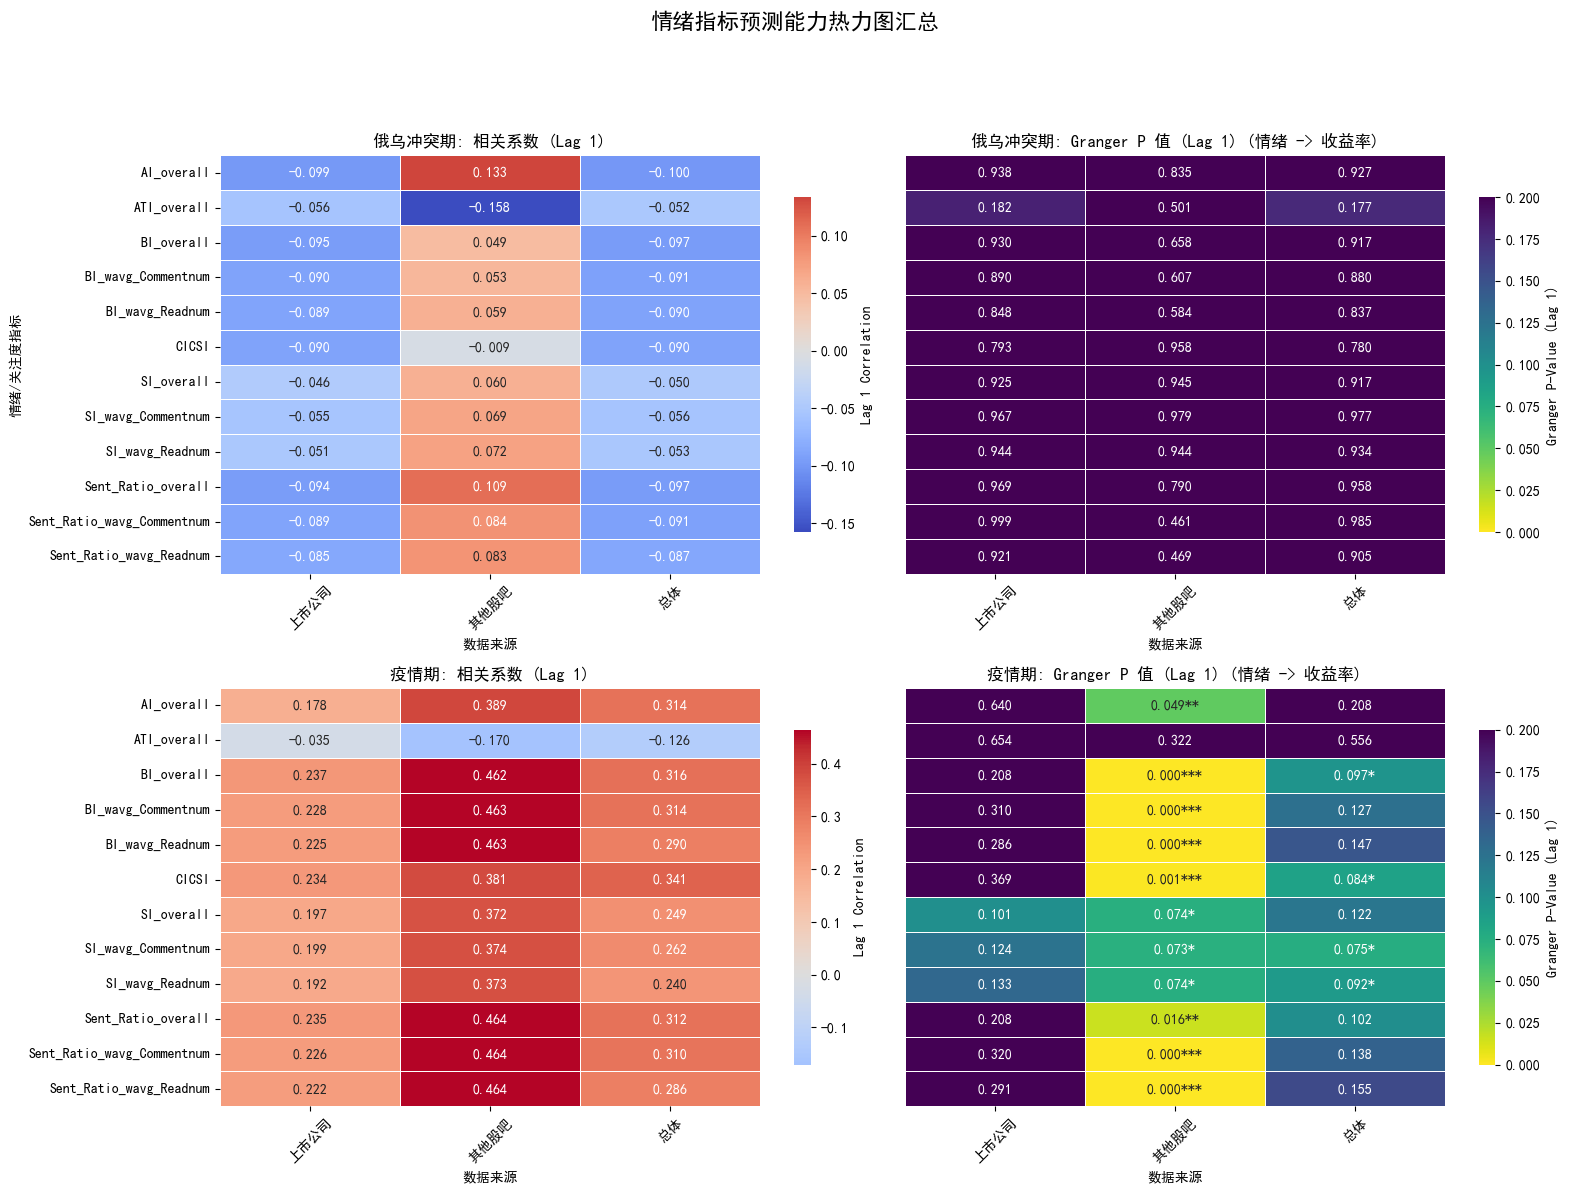

In [ ]:
# --- 7. 总结与提炼  ---
print("\n--- 7. 结果提炼与结论 ---")

summary_list = []
# 确保两个字典都已填充
valid_periods_corr = list(lagged_corr_results.keys())
valid_periods_granger = list(granger_results_pvalues.keys())

# 使用两个时期都存在的指标进行汇总
common_periods = set(valid_periods_corr) & set(valid_periods_granger)
if not common_periods:
     print("错误：未能同时获取两个时期的相关性和格兰杰检验结果，无法汇总。")
else:
    print(f"汇总时期: {common_periods}")
    for period in common_periods: # 确保只处理都有结果的时期
        for source in analysis_sources.keys():
            # 确保该来源在该时期有结果
            if source not in lagged_corr_results.get(period, {}) or source not in granger_results_pvalues.get(period, {}):
                continue
            # 再次获取有效的指标列（因为不同来源可能有不同列）
            df_merged_current = merged_data_dict.get(source)
            if df_merged_current is None: continue
            current_sentiment_cols = [col for col in sentiment_indicators if col in df_merged_current.columns]

            for indicator in current_sentiment_cols:
                # 获取相关性
                corr_dict = lagged_corr_results[period][source]
                corr_key = f'{indicator}_lag{lag}'
                corr = corr_dict.get(corr_key) # 使用 get 避免 KeyError

                # 获取P值
                pval_dict = granger_results_pvalues[period][source]
                pval = pval_dict.get(indicator) # 使用 get 避免 KeyError

                # 获取用于检验的序列名
                stationary_indicator_name = stationary_series_map.get(source, {}).get(indicator, 'N/A')

                if corr is not None or pval is not None: # 只要有一个结果就记录
                    summary_list.append({
                        'Period': period,
                        'Source': source,
                        'Indicator': indicator,
                        f'Corr_Lag{lag}': corr,
                        'Granger_PValue': pval,
                        # 显著性判断更严谨，只有成功检验且p<=0.05才算显著
                        'Granger_Significant': '<= 0.05' if pval is not None and pval <= 0.05 else ('NA' if pval is None else '> 0.05'),
                        'Stationary_Series_Used': stationary_indicator_name
                    })

    if summary_list:
        df_summary = pd.DataFrame(summary_list)
        # 填充 NaN 相关系数为 0，方便排序和计算平均值
        df_summary[f'Corr_Lag{lag}'] = df_summary[f'Corr_Lag{lag}'].fillna(0)
        # 按时期、相关性绝对值排序
        df_summary = df_summary.sort_values(by=['Period', 'Source', f'Corr_Lag{lag}'],
                                            key=lambda x: x.abs() if x.name == f'Corr_Lag{lag}' else x, # 按绝对值排相关性
                                            ascending=[True, True, False])

# --- 7.1 可视化方案一：热力图展示结果 ---
print("\n--- 7.1 可视化方案：热力图 ---")

if 'df_summary' in locals() and not df_summary.empty:
    # 选择要可视化的列
    corr_col = f'Corr_Lag{lag}'
    pval_col = 'Granger_PValue'

    # 获取所有有效的指标和来源
    all_indicators = df_summary['Indicator'].unique()
    all_sources = df_summary['Source'].unique()

    for period_name in df_summary['Period'].unique():
        print(f"\n为时期 '{period_name}' 生成热力图...")
        df_period_summary = df_summary[df_summary['Period'] == period_name]

        # --- 准备相关系数热力图数据 ---
        try:
            # 使用 pivot_table 创建矩阵：行=指标，列=来源，值=相关系数
            corr_pivot = df_period_summary.pivot_table(
                index='Indicator', columns='Source', values=corr_col
            )
            # 重新索引以保持一致顺序 (可选)
            corr_pivot = corr_pivot.reindex(index=all_indicators, columns=all_sources)

            plt.figure(figsize=(max(8, len(all_sources)*1.5), max(6, len(all_indicators)*0.5))) # 动态调整尺寸
            sns.heatmap(corr_pivot, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, center=0, cbar_kws={'label': f'Lag {lag} Correlation'})
            plt.title(f'{period_name}: 情绪指标 (Lag {lag}) 与黄金收益率的相关系数')
            plt.xlabel('数据来源')
            plt.ylabel('情绪/关注度指标')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.savefig(f'heatmap_correlation_{period_name}.png')
            plt.show()
        except Exception as e:
            print(f"  生成相关系数热力图失败: {e}")

        # --- 准备格兰杰 P 值热力图数据 ---
        try:
            pval_pivot = df_period_summary.pivot_table(
                index='Indicator', columns='Source', values=pval_col
            )
            pval_pivot = pval_pivot.reindex(index=all_indicators, columns=all_sources)

            plt.figure(figsize=(max(8, len(all_sources)*1.5), max(6, len(all_indicators)*0.5)))
            # 使用不同的 colormap，例如 'viridis_r' (反转viridis)，让小p值颜色更深/亮
            # annot=True 显示数值，annot_kws 控制字体大小
            # 定义显著性格式化函数
            def format_pval(val):
                if pd.isna(val): return "NA"
                return f"{val:.3f}{'***' if val <= 0.01 else '**' if val <= 0.05 else '*' if val <= 0.1 else ''}"

            annot_labels = pval_pivot.applymap(format_pval) # 应用格式化

            sns.heatmap(pval_pivot, annot=annot_labels, fmt="", cmap='viridis_r', linewidths=.5,
                        cbar_kws={'label': f'Granger P-Value (Lag {lag})'},
                        vmin=0, vmax=0.2) # 设置颜色范围，突出小p值
            plt.title(f'{period_name}: 情绪指标 (Lag {lag}) -> 黄金收益率 Granger P 值 (显著性: *** p<=0.01, ** p<=0.05, * p<=0.1)')
            plt.xlabel('数据来源')
            plt.ylabel('情绪/关注度指标')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.savefig(f'heatmap_granger_pvalue_{period_name}.png')
            plt.show()
        except Exception as e:
            print(f"  生成 P 值热力图失败: {e}")

else:
    print("df_summary 不存在或为空，无法生成热力图。")


In [86]:
# --- 7.2 可视化方案二：散点图 (相关性 vs P值) ---
print("\n--- 7.2 可视化方案：散点图 (相关性 vs P值) ---")

if 'df_summary' in locals() and not df_summary.empty:
    # 准备绘图数据，计算相关系数绝对值
    df_scatter = df_summary.copy()
    corr_col = f'Corr_Lag{lag}'
    pval_col = 'Granger_PValue'
    df_scatter['Abs_Corr'] = df_scatter[corr_col].abs()
    # 将非显著 P 值设为一个稍大的值，便于 log scale 显示 (可选)
    # df_scatter[pval_col] = df_scatter[pval_col].fillna(1.0).clip(lower=1e-5) # 避免 log(0)

    # 使用 Plotly Express 创建分面散点图
    fig_scatter = px.scatter(
        df_scatter,
        x='Abs_Corr',
        y=pval_col,
        color='Source',       # 按来源区分颜色
        symbol='Period',      # 按时期区分形状
        text='Indicator',     # 在点旁边显示指标名称
        title=f'指标预测能力评估: 滞后{lag}天相关性绝对值 vs Granger P 值',
        labels={
            'Abs_Corr': f'|滞后{lag}天相关系数|',
            pval_col: f'Granger P 值 (情绪 -> 收益率, 滞后{lag}天)',
            'Source': '数据来源',
            'Period': '时期',
            'Indicator': '指标'
        },
        hover_data=[corr_col, 'Granger_Significant'], # 悬停时显示原始相关系数和显著性
        # log_y=True # 考虑使用对数 Y 轴突出小 P 值
    )

    # 调整文本标签位置和大小
    fig_scatter.update_traces(textposition='top center', textfont_size=8)

    # 添加显著性水平线
    fig_scatter.add_hline(y=0.05, line_width=1, line_dash="dash", line_color="red", annotation_text="P=0.05")
    # 可以添加一个相关性阈值线 (例如 |Corr|>0.1)
    fig_scatter.add_vline(x=0.1, line_width=1, line_dash="dash", line_color="green", annotation_text="|Corr|=0.1")

    # 调整布局
    fig_scatter.update_layout(height=700, width=1000, legend_title_text='图例')
    fig_scatter.update_yaxes(range=[-0.05, 1.05]) # 设置y轴范围，包含0和1
    # 如果使用 log_y=True, 可以设置 fig_scatter.update_yaxes(type='log', range=[-5, 0]) # log(1e-5) 到 log(1)

    fig_scatter.show()
    # fig_scatter.write_image("scatter_corr_vs_pvalue.png")

else:
    print("df_summary 不存在或为空，无法生成散点图。")


--- 7.2 可视化方案：散点图 (相关性 vs P值) ---


In [88]:
# --- 基于结果提炼结论 (修正版) ---
print("\n初步结论提炼:")

# 检查格兰杰检验是否普遍不显著
granger_sig_overall_ratio = (df_summary['Granger_Significant'] == '<= 0.05').mean()
print(f"\n整体格兰杰显著比例 (p<=0.05): {granger_sig_overall_ratio:.2%}")

if granger_sig_overall_ratio < 0.1: # 如果显著比例很低 (例如低于10%)
        print("注意：格兰杰因果检验结果普遍不显著。这可能意味着（尤其在冲突时期）：")
        print("  1. 市场情绪更多是跟随或同步于价格，而非领先指标。")
        print("  2. 宏观/事件因素对价格的影响远超情绪因素。")
        print("  3. 情绪指标未能捕捉关键信息或存在噪音。")
        print("  4. 情绪与价格的关系可能是非线性的。")
        print("因此，后续将主要依据【滞后相关性绝对值】来评估相对预测关联强度。")
        primary_metric = f'Corr_Lag{lag}'
        sort_ascending = False
        metric_label = "平均绝对相关性"
else:
        print("格兰杰检验显示部分指标具有显著预测能力。将结合【格兰杰显著比例】和【平均绝对相关性】进行评估。")
        # 可以创建一个综合评分，或者分别报告
        primary_metric = 'Granger_Significant_Score' # 需要计算这个分数
        df_summary[primary_metric] = (df_summary['Granger_Significant'] == '<= 0.05').astype(int)
        sort_ascending = False # 分数越高越好
        metric_label = "Granger显著比例/评分"


# 1. 哪个来源表现更好？
source_performance = df_summary.groupby('Source').agg(
    Avg_Abs_Corr=(f'Corr_Lag{lag}', lambda x: x.abs().mean()),
    Granger_Sig_Ratio=('Granger_Significant', lambda x: (x == '<= 0.05').mean())
    # 可以加入其他聚合，如平均P值等
).sort_values(by='Avg_Abs_Corr' if primary_metric == f'Corr_Lag{lag}' else 'Granger_Sig_Ratio', ascending=sort_ascending) # 根据主要依据排序

print(f"\n数据来源表现对比 ({metric_label} & 平均绝对相关性):")
print(source_performance)
best_source = source_performance.index[0] if not source_performance.empty else "N/A"
print(f"初步来看，基于主要评估指标，'{best_source}' 来源表现相对更优。")


# 2. 哪个指标表现更好？
indicator_performance = df_summary.groupby('Indicator').agg(
        Avg_Abs_Corr=(f'Corr_Lag{lag}', lambda x: x.abs().mean()),
        Granger_Sig_Ratio=('Granger_Significant', lambda x: (x == '<= 0.05').mean())
).sort_values(by='Avg_Abs_Corr' if primary_metric == f'Corr_Lag{lag}' else 'Granger_Sig_Ratio', ascending=sort_ascending)

print(f"\n情绪指标表现对比 ({metric_label} & 平均绝对相关性):")
print(indicator_performance)
best_indicator = indicator_performance.index[0] if not indicator_performance.empty else "N/A"
print(f"初步来看，基于主要评估指标，'{best_indicator}' 指标表现相对更优。")


# 3. 不同时期表现差异？
period_comparison_corr = df_summary.groupby(['Period', 'Indicator'])[f'Corr_Lag{lag}'].mean().unstack()
print("\n不同时期各指标平均相关性对比:")
print(period_comparison_corr)
period_comparison_granger = df_summary.groupby(['Period', 'Indicator'])['Granger_Significant'].apply(lambda x: (x == '<= 0.05').mean()).unstack()
print("\n不同时期各指标格兰杰显著比例对比:")
print(period_comparison_granger)


print(f"\n最终建议：综合滞后{lag}天的相关性和格兰杰检验结果（注意其显著性），数据来源 '{best_source}' 中的 '{best_indicator}' 指标似乎是与下一日黄金收益率关联性相对更强的选择。")
if granger_sig_overall_ratio < 0.1:
    print("然而，由于格兰杰检验普遍不显著，这些指标的独立预测价值有限，更多是反映了一种伴随关系或滞后反应。")
print("在不同时期，指标和来源的表现可能存在差异，建议结合具体时期的结果进行判断。")


初步结论提炼:

整体格兰杰显著比例 (p<=0.05): 11.11%
格兰杰检验显示部分指标具有显著预测能力。将结合【格兰杰显著比例】和【平均绝对相关性】进行评估。

数据来源表现对比 (Granger显著比例/评分 & 平均绝对相关性):
        Avg_Abs_Corr  Granger_Sig_Ratio
Source                                 
其他股吧        0.240739           0.333333
上市公司        0.139466           0.000000
总体          0.179741           0.000000
初步来看，基于主要评估指标，'其他股吧' 来源表现相对更优。

情绪指标表现对比 (Granger显著比例/评分 & 平均绝对相关性):
                            Avg_Abs_Corr  Granger_Sig_Ratio
Indicator                                                  
AI_overall                      0.202357           0.166667
BI_overall                      0.209382           0.166667
BI_wavg_Commentnum              0.206576           0.166667
BI_wavg_Readnum                 0.202679           0.166667
CICSI                           0.190849           0.166667
Sent_Ratio_overall              0.218596           0.166667
Sent_Ratio_wavg_Commentnum      0.210702           0.166667
Sent_Ratio_wavg_Readnum         0.204580           0.166667
ATI_ove

In [87]:
# --- 7.3 可视化方案三：排序条形图 (展示性能排名) ---
print("\n--- 7.3 可视化方案：排序条形图 ---")

# 假设 source_performance 和 indicator_performance 已经在结论提炼部分计算好了
if 'source_performance' in locals() and 'indicator_performance' in locals():

    # --- 绘制数据来源性能对比图 ---
    df_plot_source = source_performance.reset_index()
    fig_source_rank = make_subplots(rows=1, cols=2, subplot_titles=("按平均绝对相关性排名", "按Granger显著比例排名"))

    # 按 Avg_Abs_Corr 排序并绘图
    df_plot_source_corr = df_plot_source.sort_values(by='Avg_Abs_Corr', ascending=False)
    fig_source_rank.add_trace(go.Bar(
        x=df_plot_source_corr['Source'],
        y=df_plot_source_corr['Avg_Abs_Corr'],
        name='平均绝对相关性',
        text=df_plot_source_corr['Avg_Abs_Corr'].apply(lambda x: f'{x:.3f}'),
        textposition='auto'
    ), row=1, col=1)

    # 按 Granger_Sig_Ratio 排序并绘图
    df_plot_source_granger = df_plot_source.sort_values(by='Granger_Sig_Ratio', ascending=False)
    fig_source_rank.add_trace(go.Bar(
        x=df_plot_source_granger['Source'],
        y=df_plot_source_granger['Granger_Sig_Ratio'],
        name='Granger显著比例',
        text=df_plot_source_granger['Granger_Sig_Ratio'].apply(lambda x: f'{x:.1%}'), # 格式化为百分比
        textposition='auto'
    ), row=1, col=2)

    fig_source_rank.update_layout(title_text='数据来源预测性能对比', height=500, showlegend=False)
    fig_source_rank.update_yaxes(title_text="平均绝对相关性", row=1, col=1)
    fig_source_rank.update_yaxes(title_text="Granger显著比例", tickformat=".0%", row=1, col=2) # Y轴也用百分比格式
    fig_source_rank.show()
    # fig_source_rank.write_image("source_performance_ranking.png")


    # --- 绘制情绪指标性能对比图 ---
    df_plot_indicator = indicator_performance.reset_index()
    fig_indicator_rank = make_subplots(rows=1, cols=2, subplot_titles=("按平均绝对相关性排名", "按Granger显著比例排名"))

    # 按 Avg_Abs_Corr 排序并绘图
    df_plot_indicator_corr = df_plot_indicator.sort_values(by='Avg_Abs_Corr', ascending=False)
    fig_indicator_rank.add_trace(go.Bar(
        y=df_plot_indicator_corr['Indicator'], # 指标名放Y轴更好看
        x=df_plot_indicator_corr['Avg_Abs_Corr'],
        orientation='h', # 水平条形图
        name='平均绝对相关性',
        text=df_plot_indicator_corr['Avg_Abs_Corr'].apply(lambda x: f'{x:.3f}'),
        textposition='auto'
    ), row=1, col=1)

    # 按 Granger_Sig_Ratio 排序并绘图
    df_plot_indicator_granger = df_plot_indicator.sort_values(by='Granger_Sig_Ratio', ascending=False)
    fig_indicator_rank.add_trace(go.Bar(
        y=df_plot_indicator_granger['Indicator'],
        x=df_plot_indicator_granger['Granger_Sig_Ratio'],
        orientation='h',
        name='Granger显著比例',
        text=df_plot_indicator_granger['Granger_Sig_Ratio'].apply(lambda x: f'{x:.1%}'),
        textposition='auto'
    ), row=1, col=2)

    fig_indicator_rank.update_layout(title_text='情绪指标预测性能对比', height=max(500, len(df_plot_indicator)*30), showlegend=False) # 动态高度
    fig_indicator_rank.update_xaxes(title_text="平均绝对相关性", row=1, col=1)
    fig_indicator_rank.update_xaxes(title_text="Granger显著比例", tickformat=".0%", row=1, col=2)
    fig_indicator_rank.update_yaxes(categoryorder='total ascending') # 让Y轴按值排序显示
    fig_indicator_rank.show()
    # fig_indicator_rank.write_image("indicator_performance_ranking.png")

else:
    print("无法生成排序条形图，缺少 performance 数据。")


--- 7.3 可视化方案：排序条形图 ---


In [76]:
# --- 7. Final Summary & Discussion Points ---
print("\n--- 7. 分析完成 ---")
print("要点回顾:")
print("- 计算了基础情感指数、学术情绪指标 (BI, SI, ATI, AI,CICSI 及加权版本。")
print("- 聚合了上市公司、其他股吧、及所有来源的每日数据。")
print("- 使用 Plotly 进行了多维度的时间序列可视化对比 (总体趋势、加权影响、来源差异、个体vs平均、关注度、交易时段占比、价格vs情绪)。")
print("- 进行了严格的统计分析：ADF平稳性检验、滞后相关性分析、格兰杰因果检验。")

print("\n后续可深入讨论:")
print("- 不同情感指标 (Sent_Ratio, BI, SI, CICSI) 在预测金价收益率方面的表现对比。")
print("- 不同来源 (上市公司 vs 其他股吧 vs 总体) 情绪指标的预测能力差异。")
print("- 权重选择 (阅读数 vs 评论数) 对加权情绪指标预测能力的影响。")
print("- 滞后期的选择对相关性和格兰杰因果关系结果的影响。")
print("- 两个时期（疫情 vs 俄乌冲突）之间，情绪与价格关系的异同。")
print("- 交易时段与非交易时段情绪差异的深层原因及其与市场行为的联系。")


--- 7. 分析完成 ---
要点回顾:
- 计算了基础情感指数、学术情绪指标 (BI, SI, ATI, AI,CICSI 及加权版本。
- 聚合了上市公司、其他股吧、及所有来源的每日数据。
- 使用 Plotly 进行了多维度的时间序列可视化对比 (总体趋势、加权影响、来源差异、个体vs平均、关注度、交易时段占比、价格vs情绪)。
- 进行了严格的统计分析：ADF平稳性检验、滞后相关性分析、格兰杰因果检验。

后续可深入讨论:
- 不同情感指标 (Sent_Ratio, BI, SI, CICSI) 在预测金价收益率方面的表现对比。
- 不同来源 (上市公司 vs 其他股吧 vs 总体) 情绪指标的预测能力差异。
- 权重选择 (阅读数 vs 评论数) 对加权情绪指标预测能力的影响。
- 滞后期的选择对相关性和格兰杰因果关系结果的影响。
- 两个时期（疫情 vs 俄乌冲突）之间，情绪与价格关系的异同。
- 交易时段与非交易时段情绪差异的深层原因及其与市场行为的联系。
